# Life Insurance Data Capstone Project

### Problem Statement: The dataset belongs to a leading life insurance company. The company wants to predict the bonus for its agents so that it may design appropriate engagement activity for their high performing agents and upskill programs for low performing agents.

**Data Dictionary**

<b>CustID</b> - Unique customer ID </br>
<b>AgentBonus</b> - Bonus amount given to each agents in last month </br>
<b>Age</b> - Age of customer </br>
<b>CustTenure</b> - Tenure of customer in organization </br>
<b>Channel</b> - Channel through which acquisition of customer is done </br>
<b>Occupation</b> - Occupation of customer </br>
<b>EducationField</b> - Field of education of customer </br>
<b>Gender</b> - Gender of customer </br>
<b>ExistingProdType</b> - Existing product type of customer </br>
<b>Designation</b> - Designation of customer in their organization </br>
<b>NumberOfPolicy</b> - Total number of existing policy of a customer </br>
<b>MaritalStatus</b> - Marital status of customer </br>
<b>MonthlyIncome</b> - Gross monthly income of customer </br>
<b>Complaint</b> - Indicator of complaint registered in last one month by customer </br>
<b>ExistingPolicyTenure</b> - Max tenure in all existing policies of customer </br>
<b>SumAssured</b> - Max of sum assured in all existing policies of customer </br>
<b>Zone</b> - Customer belongs to which zone in India. Like East, West, North and South </br>
<b>PaymentMethod</b> - Frequency of payment selected by customer like Monthly, quarterly, half yearly and yearly </br>
<b>LastMonthCalls</b> - Total calls attempted by company to a customer for cross sell </br>
<b>CustCareScore</b> - Customer satisfaction score given by customer in previous service call </br>

In [1]:
# Importing libraries

import numpy as np #Linera algebra
import pandas as pd #data manipulation and analysis
import matplotlib.pyplot as plt #plots and visualizations
import seaborn as sns #visualizations

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Importing excel sheet into dataframe
df = pd.read_excel("Sales.xlsx", sheet_name="Sales")

In [3]:
#Making dataframe copy to avoid any changes in original dataframe
SalesDf = df.copy()

In [4]:
#Shape of the data
print(f"Total number of rows in dataset are {SalesDf.shape[0]} and columns are {SalesDf.shape[1]}")

Total number of rows in dataset are 4520 and columns are 20


In [5]:
#Checking columns name, if necessary need to change it then
SalesDf.columns

Index(['CustID', 'AgentBonus', 'Age', 'CustTenure', 'Channel', 'Occupation',
       'EducationField', 'Gender', 'ExistingProdType', 'Designation',
       'NumberOfPolicy', 'MaritalStatus', 'MonthlyIncome', 'Complaint',
       'ExistingPolicyTenure', 'SumAssured', 'Zone', 'PaymentMethod',
       'LastMonthCalls', 'CustCareScore'],
      dtype='object')

Column names are in proper format and no need to change them.

In [6]:
# Printing head values of dataset
SalesDf.head()

,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,7000000,4409,22.0,4.0,Agent,Salaried,Graduate,Female,3,Manager,2.0,Single,20993.0,1,2.0,806761.0,North,Half Yearly,5,2.0
1,7000001,2214,11.0,2.0,Third Party Partner,Salaried,Graduate,Male,4,Manager,4.0,Divorced,20130.0,0,3.0,294502.0,North,Yearly,7,3.0
2,7000002,4273,26.0,4.0,Agent,Free Lancer,Post Graduate,Male,4,Exe,3.0,Unmarried,17090.0,1,2.0,NaN,North,Yearly,0,3.0
3,7000003,1791,11.0,NaN,Third Party Partner,Salaried,Graduate,Fe male,3,Executive,3.0,Divorced,17909.0,1,2.0,268635.0,West,Half Yearly,0,5.0
4,7000004,2955,6.0,NaN,Agent,Small Business,UG,Male,3,Executive,4.0,Divorced,18468.0,0,4.0,366405.0,West,Half Yearly,2,5.0


In [7]:
# Printing tail values
SalesDf.tail()

,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
4515,7004515,3953,4.0,8.0,Agent,Small Business,Graduate,Male,4,Senior Manager,2.0,Single,26355.0,0,2.0,636473.0,West,Yearly,9,1.0
4516,7004516,2939,9.0,9.0,Agent,Salaried,Under Graduate,Female,2,Executive,2.0,Married,20991.0,0,3.0,296813.0,North,Yearly,1,3.0
4517,7004517,3792,23.0,23.0,Agent,Salaried,Engineer,Female,5,AVP,5.0,Single,NaN,0,2.0,667371.0,North,Half Yearly,4,1.0
4518,7004518,4816,10.0,10.0,Online,Small Business,Graduate,Female,4,Executive,2.0,Single,20068.0,0,6.0,943999.0,West,Half Yearly,1,5.0
4519,7004519,4764,14.0,10.0,Agent,Salaried,Under Graduate,Female,5,Manager,2.0,Married,23820.0,0,3.0,700308.0,North,Half Yearly,1,3.0


In [8]:
# Getting dataset info
SalesDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustID                4520 non-null   int64  
 1   AgentBonus            4520 non-null   int64  
 2   Age                   4251 non-null   float64
 3   CustTenure            4294 non-null   float64
 4   Channel               4520 non-null   object 
 5   Occupation            4520 non-null   object 
 6   EducationField        4520 non-null   object 
 7   Gender                4520 non-null   object 
 8   ExistingProdType      4520 non-null   int64  
 9   Designation           4520 non-null   object 
 10  NumberOfPolicy        4475 non-null   float64
 11  MaritalStatus         4520 non-null   object 
 12  MonthlyIncome         4284 non-null   float64
 13  Complaint             4520 non-null   int64  
 14  ExistingPolicyTenure  4336 non-null   float64
 15  SumAssured           

<b>7 variables are float, 5 variables are int and 8 variables are object datatype</b>

In [9]:
# Describing dataset
pd.options.display.float_format = '{:.2f}'.format
SalesDf.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustID,4520.00,NaN,NaN,NaN,7002259.50,1304.96,7000000.00,7001129.75,7002259.50,7003389.25,7004519.00
AgentBonus,4520.00,NaN,NaN,NaN,4077.84,1403.32,1605.00,3027.75,3911.50,4867.25,9608.00
Age,4251.00,NaN,NaN,NaN,14.49,9.04,2.00,7.00,13.00,20.00,58.00
CustTenure,4294.00,NaN,NaN,NaN,14.47,8.96,2.00,7.00,13.00,20.00,57.00
Channel,4520,3,Agent,3194,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,4520,5,Salaried,2192,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EducationField,4520,7,Graduate,1870,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,4520,3,Male,2688,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ExistingProdType,4520.00,NaN,NaN,NaN,3.69,1.02,1.00,3.00,4.00,4.00,6.00
Designation,4520,6,Manager,1620,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
SalesDf.isnull().sum()

CustID                    0
AgentBonus                0
Age                     269
CustTenure              226
Channel                   0
Occupation                0
EducationField            0
Gender                    0
ExistingProdType          0
Designation               0
NumberOfPolicy           45
MaritalStatus             0
MonthlyIncome           236
Complaint                 0
ExistingPolicyTenure    184
SumAssured              154
Zone                      0
PaymentMethod             0
LastMonthCalls            0
CustCareScore            52
dtype: int64

In [11]:
SalesDf.duplicated().sum()

0

#### Insights
1] There are 7 variables of float datatype, 5 variables of int datatype and 8 variables of object datatype. </br>
2] CustID variable can be drop this variable as this only includes customer id and will be of no use in modeling and analysis. </br>
3] Age of customer varies from 2 years to 58 years. This shows that customer don't has age of 2 years. It must be insurance taken by the customer for their children and that should be age of children. </br>
4] There are null values in some of the columns. Need to treat them. </br>
5] There are no duplicate values in the dataset.

<b>Outlier treatment</b>

In [12]:
Sales_X = SalesDf.drop('AgentBonus', axis = 1)
Sales_Y = SalesDf['AgentBonus']

In [13]:
Q1 = Sales_X.quantile(0.25)
Q3 = Sales_X.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [14]:
((Sales_X > UL) | (Sales_X < LL)).sum()

Age                      50
Channel                   0
Complaint                 0
CustCareScore             0
CustID                    0
CustTenure               52
Designation               0
EducationField            0
ExistingPolicyTenure    131
ExistingProdType        306
Gender                    0
LastMonthCalls           12
MaritalStatus             0
MonthlyIncome           377
NumberOfPolicy            0
Occupation                0
PaymentMethod             0
SumAssured               96
Zone                      0
dtype: int64

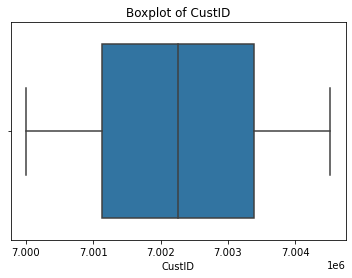

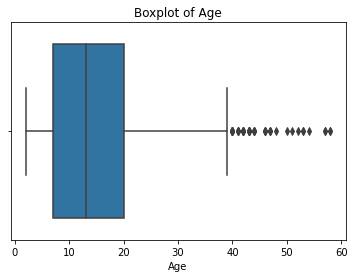

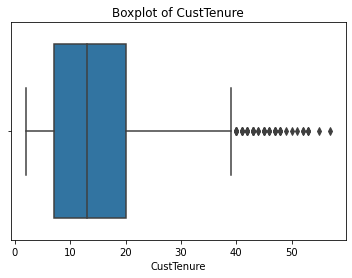

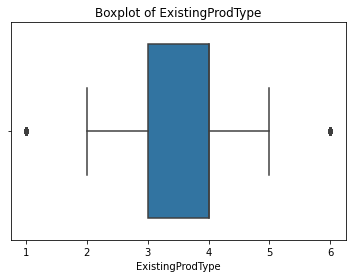

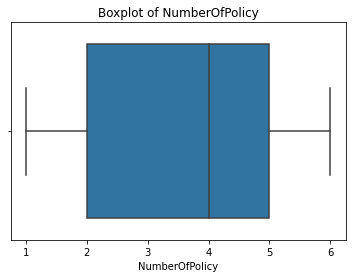

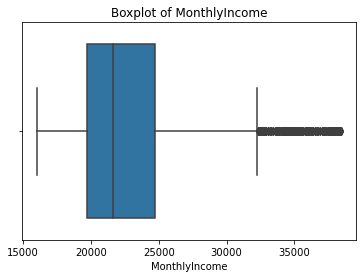

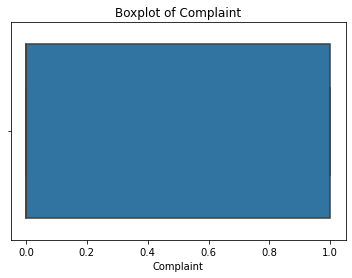

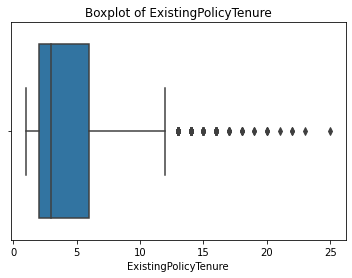

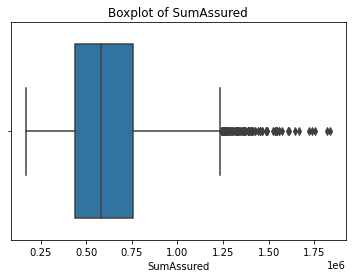

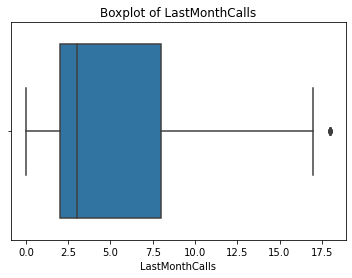

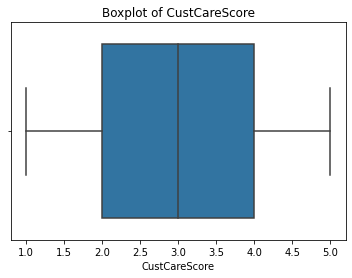

In [15]:
numerical_variables = Sales_X.select_dtypes(include=['int64', 'float64']).columns

# Iterate over the numerical variables and create boxplots
for var in numerical_variables:
    plt.figure()  # Create a new figure for each boxplot
    sns.boxplot(data=Sales_X, x=var)
    plt.title('Boxplot of {}'.format(var))
    plt.xlabel(var)
    plt.show()

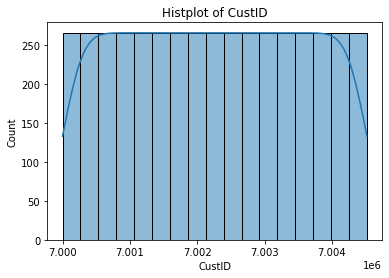

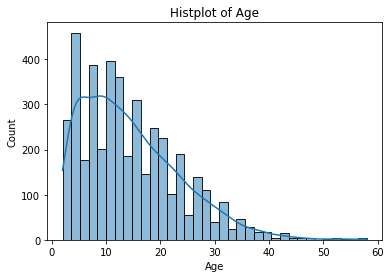

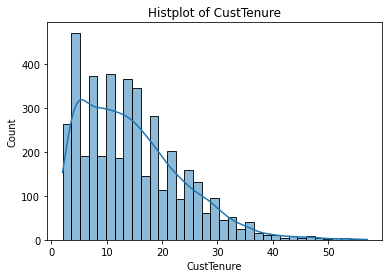

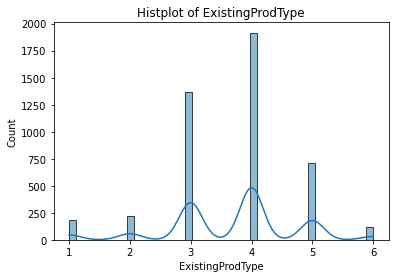

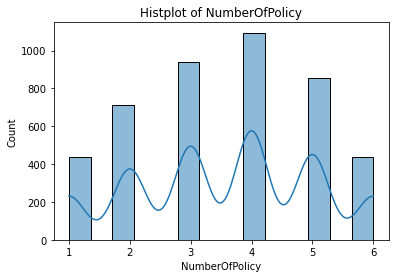

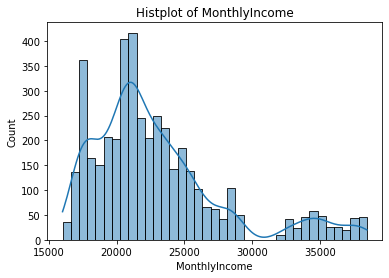

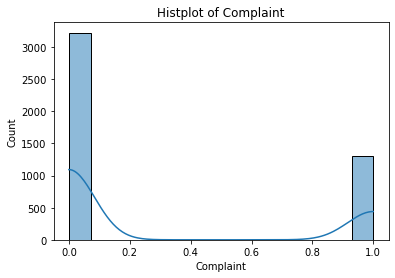

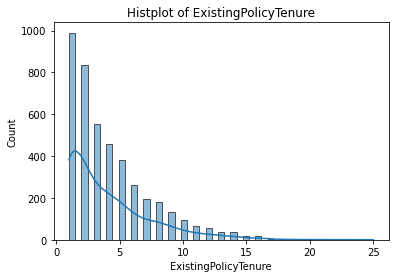

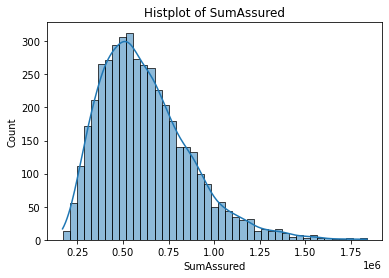

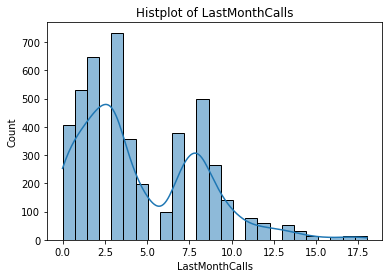

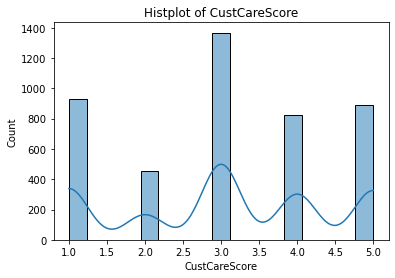

In [16]:
for var in numerical_variables:
    plt.figure()  # Create a new figure for each boxplot
    sns.histplot(data=Sales_X, x=var, kde=True)
    plt.title('Histplot of {}'.format(var))
    plt.xlabel(var)
    plt.show()

In [17]:
Sales_X[Sales_X['Age'] == Sales_X['Age'].max()]

,CustID,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
2822,7002822,58.00,48.00,Online,Salaried,Graduate,Female,6,VP,4.00,Married,38430.00,0,8.00,1604453.00,West,Yearly,11,4.00
4292,7004292,58.00,29.00,Online,Salaried,Graduate,Female,6,VP,4.00,Married,38430.00,0,8.00,1642883.00,West,Yearly,11,4.00


<b>We will not remove outlier here as it is possible to have customer age as 58. Also, outlier present can be true outlier.

In [18]:
Sales_X[Sales_X['MonthlyIncome'] == Sales_X['MonthlyIncome'].max()]

,CustID,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
2266,7002266,14.00,35.00,Agent,Salaried,Graduate,Male,5,VP,4.00,Divorced,38456.00,0,4.00,1100611.00,North,Yearly,10,2.00
3736,7003736,31.00,6.00,Agent,Salaried,Graduate,Male,5,VP,4.00,Married,38456.00,0,4.00,670673.00,North,Yearly,10,1.00


<b> Filling missing column values

In [19]:
Sales_X.isnull().sum().sum()

1166

In [20]:
Sales_X.size

85880

In [21]:
Sales_X.isnull().sum().sum()/Sales_X.size*100

1.3577084303679554

<b> Only 1.35% data is missing, so we can fill this data.

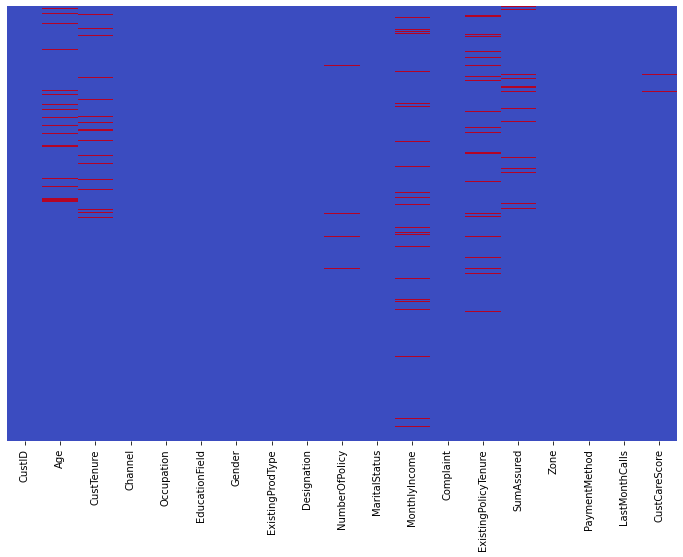

In [22]:
plt.figure(figsize = (12,8))
sns.heatmap(Sales_X.isnull(), cbar = False, cmap = 'coolwarm', yticklabels = False)
plt.show()

<b> Removing CustID column as it is not useful and may get problems while analysis

In [23]:
SalesDf = SalesDf.drop(['CustID'], axis=1)

In [24]:
SalesDf.columns

Index(['AgentBonus', 'Age', 'CustTenure', 'Channel', 'Occupation',
       'EducationField', 'Gender', 'ExistingProdType', 'Designation',
       'NumberOfPolicy', 'MaritalStatus', 'MonthlyIncome', 'Complaint',
       'ExistingPolicyTenure', 'SumAssured', 'Zone', 'PaymentMethod',
       'LastMonthCalls', 'CustCareScore'],
      dtype='object')

<b> Columns Age, CustTenure, ExistingPolicyTenure, ExistingProdType, MonthlyIncome, SumAssured, LastMonthCalls seems to have outliers when we have checked outliers with IQR (25-75).</b> </br>
<b> Age column --> missing values will be filled with Median values. </b> </br>
<b> CustTenure column --> missing values will be filled with Median values. </b> </br>
<b> NumberOfPolicy column --> missing values will be filled with Median values. </b> </br>
<b> MonthlyIncome column --> missing values will be filled with Median values. </b> </br>
<b> ExistingPolicyTenure column --> missing values will be filled with Median values. </b> </br>
<b> SumAssured column --> missing values will be filled with Median values. </b> </br>
<b> CustCareScore column --> missing values will be filled with Median values. </b> </br>

In [25]:
SalesDf['Age'].fillna(SalesDf['Age'].median(),inplace=True)
SalesDf['CustTenure'].fillna(SalesDf['CustTenure'].median(),inplace=True)
SalesDf['NumberOfPolicy'].fillna(SalesDf['NumberOfPolicy'].median(),inplace=True)
SalesDf['MonthlyIncome'].fillna(SalesDf['MonthlyIncome'].median(),inplace=True)
SalesDf['ExistingPolicyTenure'].fillna(SalesDf['ExistingPolicyTenure'].median(),inplace=True)
SalesDf['SumAssured'].fillna(SalesDf['SumAssured'].median(),inplace=True)
SalesDf['CustCareScore'].fillna(SalesDf['CustCareScore'].median(),inplace=True)

In [26]:
SalesDf.isnull().sum()

AgentBonus              0
Age                     0
CustTenure              0
Channel                 0
Occupation              0
EducationField          0
Gender                  0
ExistingProdType        0
Designation             0
NumberOfPolicy          0
MaritalStatus           0
MonthlyIncome           0
Complaint               0
ExistingPolicyTenure    0
SumAssured              0
Zone                    0
PaymentMethod           0
LastMonthCalls          0
CustCareScore           0
dtype: int64

<b> Null values are now treated

<b> Cleaning messy data in categorical datatype

In [27]:
numerical_values = SalesDf.select_dtypes(include=['int64', 'float'])
categorical_values = SalesDf.select_dtypes(include=['object'])

In [28]:
categorical_values.columns

Index(['Channel', 'Occupation', 'EducationField', 'Gender', 'Designation',
       'MaritalStatus', 'Zone', 'PaymentMethod'],
      dtype='object')

In [29]:
for i in categorical_values.columns:
    print(categorical_values[i].value_counts(), '\n ----------------------')

Agent                  3194
Third Party Partner     858
Online                  468
Name: Channel, dtype: int64 
 ----------------------
Salaried           2192
Small Business     1918
Large Business      255
Laarge Business     153
Free Lancer           2
Name: Occupation, dtype: int64 
 ----------------------
Graduate          1870
Under Graduate    1190
Diploma            496
Engineer           408
Post Graduate      252
UG                 230
MBA                 74
Name: EducationField, dtype: int64 
 ----------------------
Male       2688
Female     1507
Fe male     325
Name: Gender, dtype: int64 
 ----------------------
Manager           1620
Executive         1535
Senior Manager     676
AVP                336
VP                 226
Exe                127
Name: Designation, dtype: int64 
 ----------------------
Married      2268
Single       1254
Divorced      804
Unmarried     194
Name: MaritalStatus, dtype: int64 
 ----------------------
West     2566
North    1884
East       6

In [30]:
SalesDf['Occupation'] = SalesDf['Occupation'].replace({'Laarge Business': 'Large Business'})
SalesDf['EducationField'] = SalesDf['EducationField'].replace({'UG': 'Under Graduate'})
SalesDf['Gender'] = SalesDf['Gender'].replace({'Fe male': 'Female'})
SalesDf['Designation'] = SalesDf['Designation'].replace({'Exe': 'Executive'})
SalesDf['MaritalStatus'] = SalesDf['MaritalStatus'].replace({'Single': 'Unmarried'})

In [31]:
SalesDf['MaritalStatus'].value_counts()

Married      2268
Unmarried    1448
Divorced      804
Name: MaritalStatus, dtype: int64

In [32]:
categorical_values = SalesDf.select_dtypes(include=['object'])

In [33]:
for i in categorical_values.columns:
    print(categorical_values[i].value_counts(), '\n ----------------------')

Agent                  3194
Third Party Partner     858
Online                  468
Name: Channel, dtype: int64 
 ----------------------
Salaried          2192
Small Business    1918
Large Business     408
Free Lancer          2
Name: Occupation, dtype: int64 
 ----------------------
Graduate          1870
Under Graduate    1420
Diploma            496
Engineer           408
Post Graduate      252
MBA                 74
Name: EducationField, dtype: int64 
 ----------------------
Male      2688
Female    1832
Name: Gender, dtype: int64 
 ----------------------
Executive         1662
Manager           1620
Senior Manager     676
AVP                336
VP                 226
Name: Designation, dtype: int64 
 ----------------------
Married      2268
Unmarried    1448
Divorced      804
Name: MaritalStatus, dtype: int64 
 ----------------------
West     2566
North    1884
East       64
South       6
Name: Zone, dtype: int64 
 ----------------------
Half Yearly    2656
Yearly         1434
Mont

### Univariate Analysis

In [34]:
numerical_values.columns

Index(['AgentBonus', 'Age', 'CustTenure', 'ExistingProdType', 'NumberOfPolicy',
       'MonthlyIncome', 'Complaint', 'ExistingPolicyTenure', 'SumAssured',
       'LastMonthCalls', 'CustCareScore'],
      dtype='object')

In [35]:
categorical_values.columns

Index(['Channel', 'Occupation', 'EducationField', 'Gender', 'Designation',
       'MaritalStatus', 'Zone', 'PaymentMethod'],
      dtype='object')

In [36]:
numerical_values['AgentBonus'].describe()

count   4520.00
mean    4077.84
std     1403.32
min     1605.00
25%     3027.75
50%     3911.50
75%     4867.25
max     9608.00
Name: AgentBonus, dtype: float64

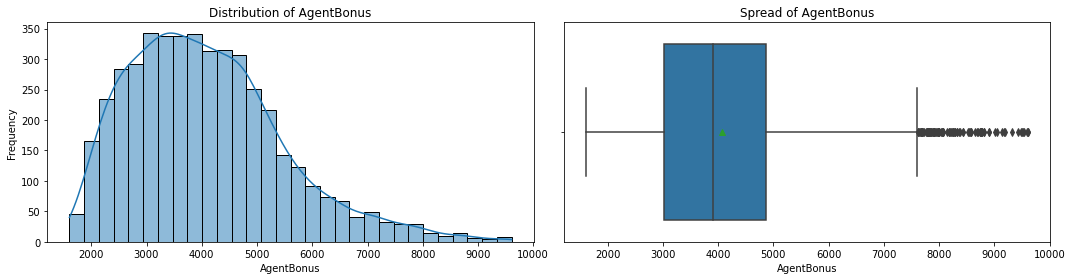

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

# Histogram
sns.histplot(numerical_values['AgentBonus'], bins=30, edgecolor='k', ax=axes[0], kde=True)
axes[0].set_xlabel('AgentBonus')
axes[0].set_ylabel('Frequency')
axes[0].set_title(f'Distribution of AgentBonus')

# Boxplot
sns.boxplot(numerical_values['AgentBonus'], ax=axes[1], showmeans=True)
# axes[1].set_ylabel('AgentBonus')
axes[1].set_title(f'Spread of AgentBonus')

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

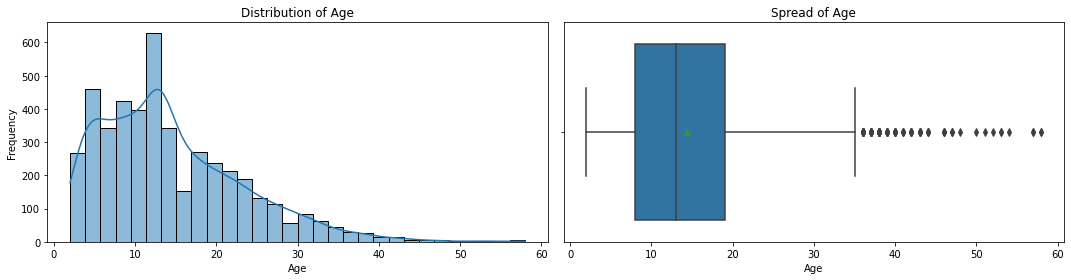

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

# Histogram
sns.histplot(numerical_values['Age'], bins=30, edgecolor='k', ax=axes[0], kde=True)
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')
axes[0].set_title(f'Distribution of Age')

# Boxplot
sns.boxplot(numerical_values['Age'], ax=axes[1], showmeans=True)
# axes[1].set_ylabel('AgentBonus')
axes[1].set_title(f'Spread of Age')

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

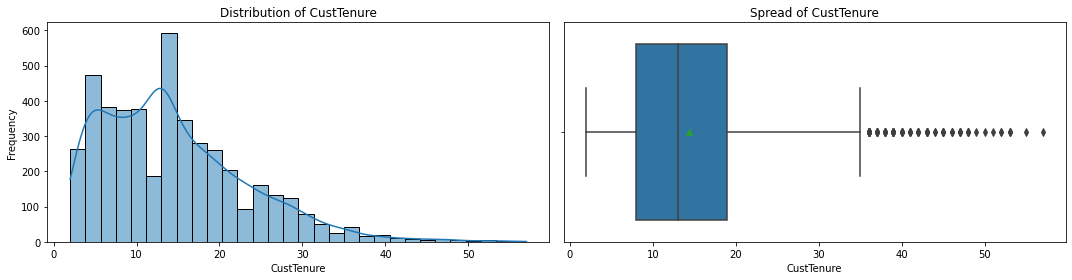

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

# Histogram
sns.histplot(numerical_values['CustTenure'], bins=30, edgecolor='k', ax=axes[0], kde=True)
axes[0].set_xlabel('CustTenure')
axes[0].set_ylabel('Frequency')
axes[0].set_title(f'Distribution of CustTenure')

# Boxplot
sns.boxplot(numerical_values['CustTenure'], ax=axes[1], showmeans=True)
axes[1].set_title(f'Spread of CustTenure')

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

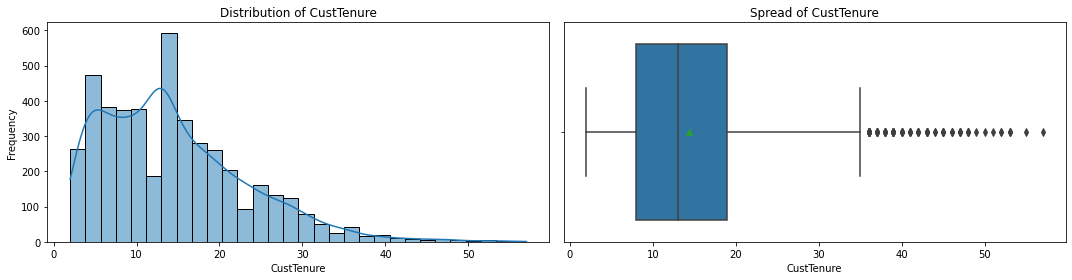

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

# Histogram
sns.histplot(numerical_values['CustTenure'], bins=30, edgecolor='k', ax=axes[0], kde=True)
axes[0].set_xlabel('CustTenure')
axes[0].set_ylabel('Frequency')
axes[0].set_title(f'Distribution of CustTenure')

# Boxplot
sns.boxplot(numerical_values['CustTenure'], ax=axes[1], showmeans=True)
axes[1].set_title(f'Spread of CustTenure')

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

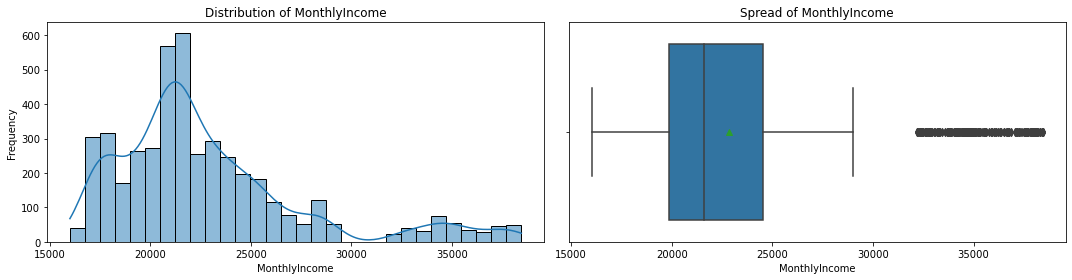

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

# Histogram
sns.histplot(numerical_values['MonthlyIncome'], bins=30, edgecolor='k', ax=axes[0], kde=True)
axes[0].set_xlabel('MonthlyIncome')
axes[0].set_ylabel('Frequency')
axes[0].set_title(f'Distribution of MonthlyIncome')

# Boxplot
sns.boxplot(numerical_values['MonthlyIncome'], ax=axes[1], showmeans=True)
axes[1].set_title(f'Spread of MonthlyIncome')

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

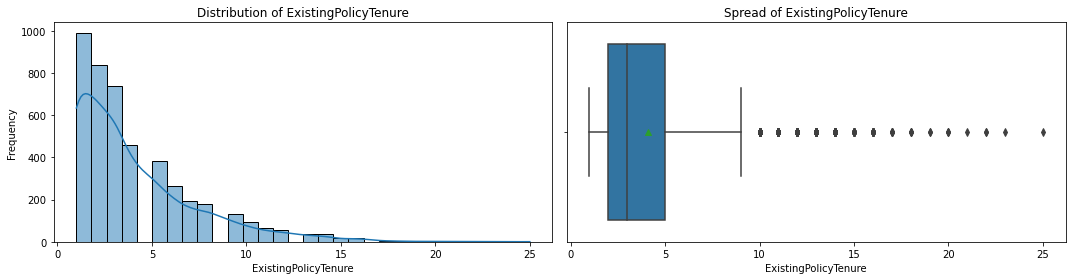

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

# Histogram
sns.histplot(numerical_values['ExistingPolicyTenure'], bins=30, edgecolor='k', ax=axes[0], kde=True)
axes[0].set_xlabel('ExistingPolicyTenure')
axes[0].set_ylabel('Frequency')
axes[0].set_title(f'Distribution of ExistingPolicyTenure')

# Boxplot
sns.boxplot(numerical_values['ExistingPolicyTenure'], ax=axes[1], showmeans=True)
axes[1].set_title(f'Spread of ExistingPolicyTenure')

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

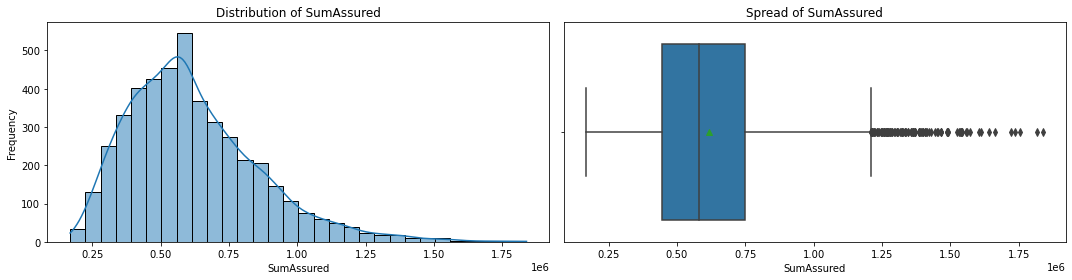

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

# Histogram
sns.histplot(numerical_values['SumAssured'], bins=30, edgecolor='k', ax=axes[0], kde=True)
axes[0].set_xlabel('SumAssured')
axes[0].set_ylabel('Frequency')
axes[0].set_title(f'Distribution of SumAssured')

# Boxplot
sns.boxplot(numerical_values['SumAssured'], ax=axes[1], showmeans=True)
axes[1].set_title(f'Spread of SumAssured')

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

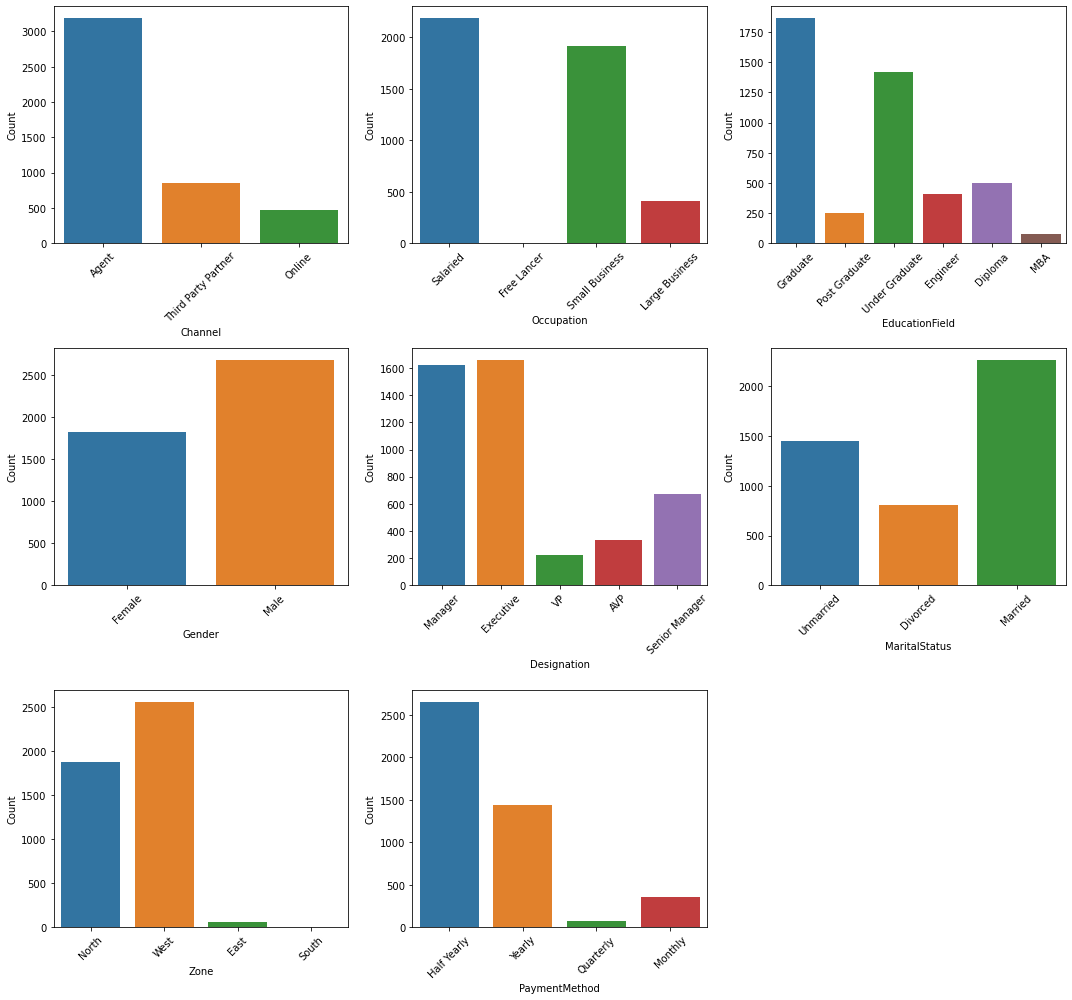

In [44]:
plt.figure(figsize=(15, 14))

for i, col in enumerate(categorical_values, 1):
    plt.subplot(3, 3, i)  # Create subplots for each categorical variable
    sns.countplot(data=SalesDf, x=col)  # Plot the count of each category
    plt.xlabel(col)  # Set the x-axis label
    plt.ylabel('Count')  # Set the y-axis label
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()  # Display the plot

### Bivariate Analysis

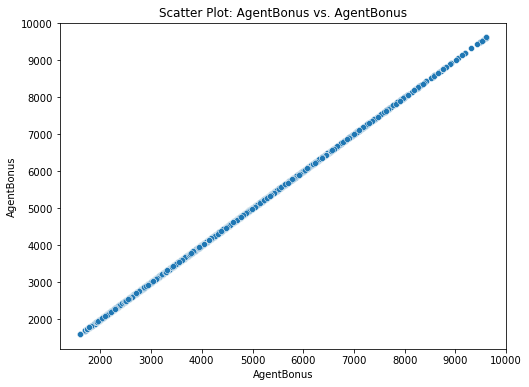

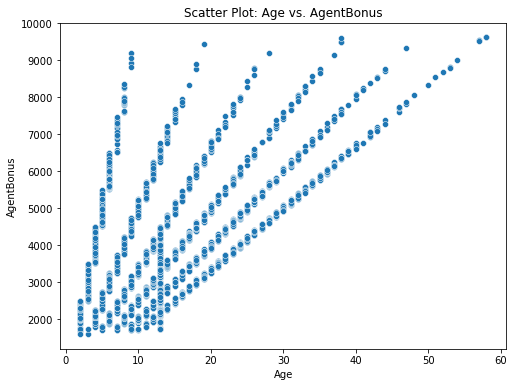

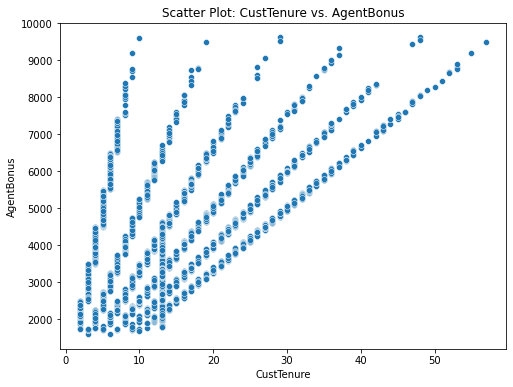

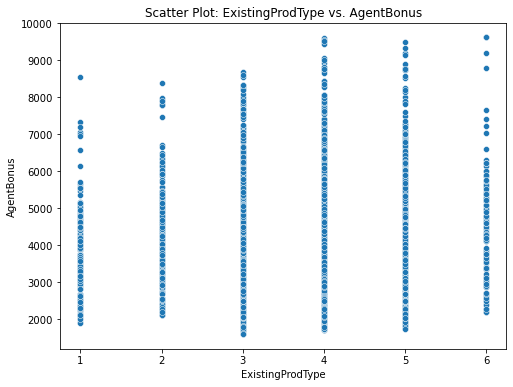

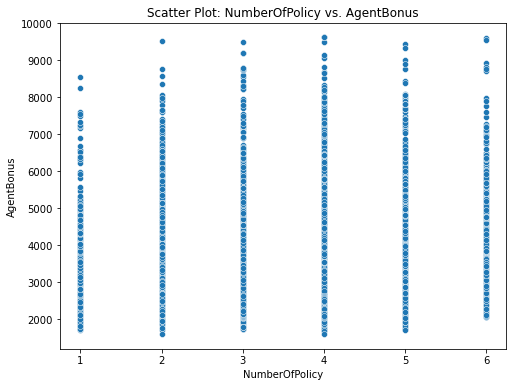

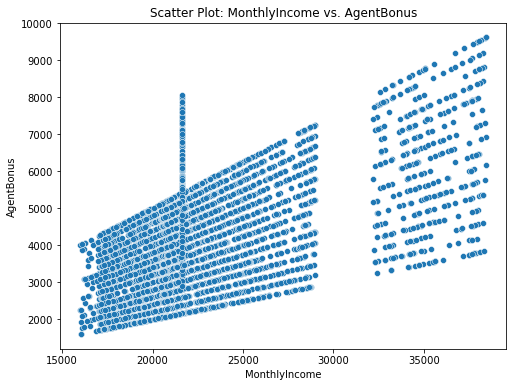

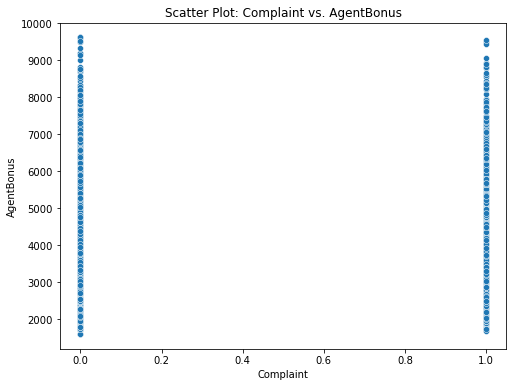

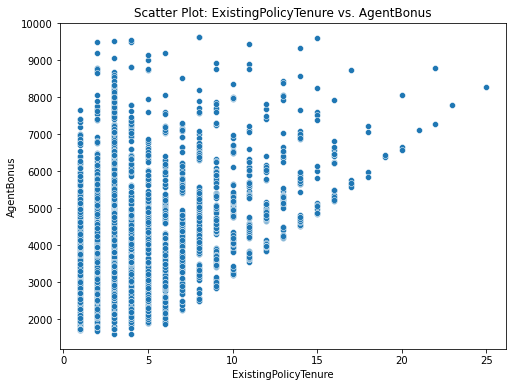

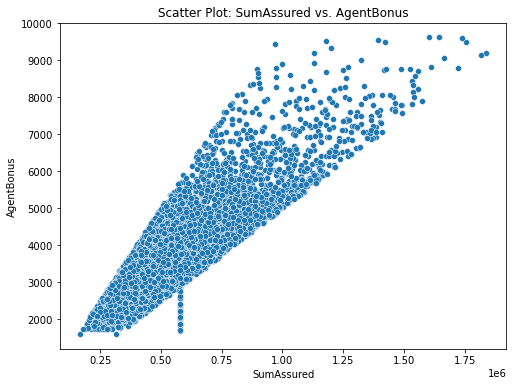

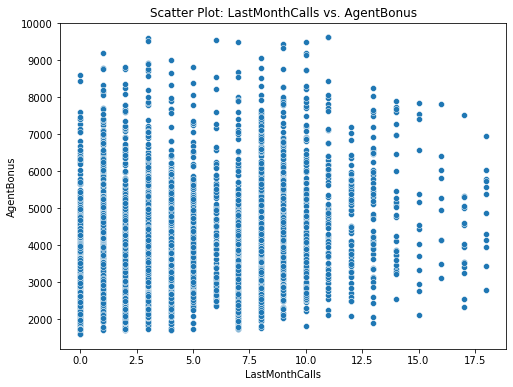

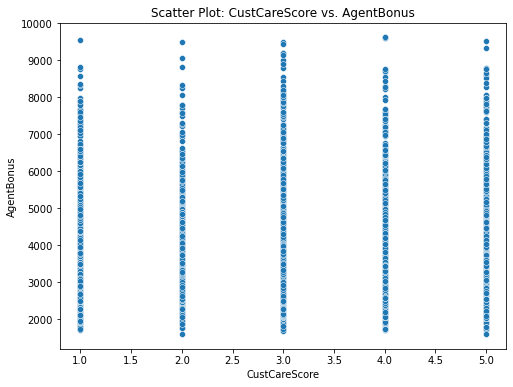

In [45]:
# Scatter plots
for var in numerical_values:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=numerical_values, x=var, y='AgentBonus')
    plt.xlabel(var)
    plt.ylabel('AgentBonus')
    plt.title(f'Scatter Plot: {var} vs. AgentBonus')
    plt.show()

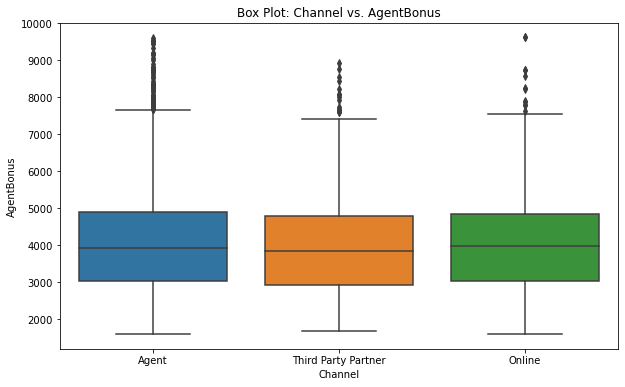

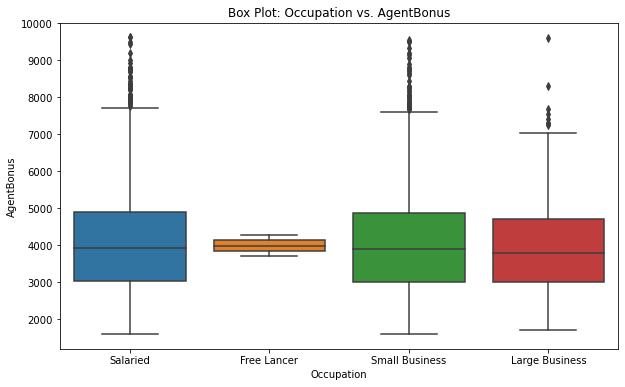

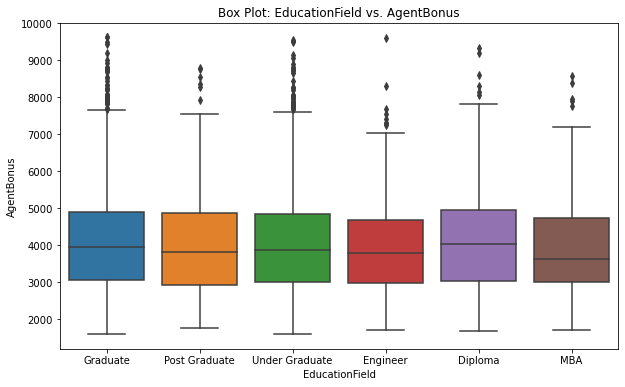

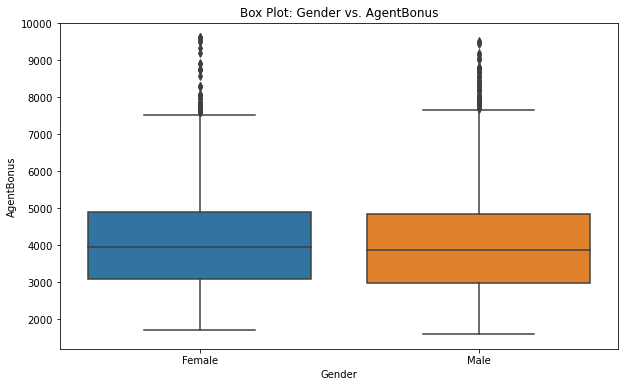

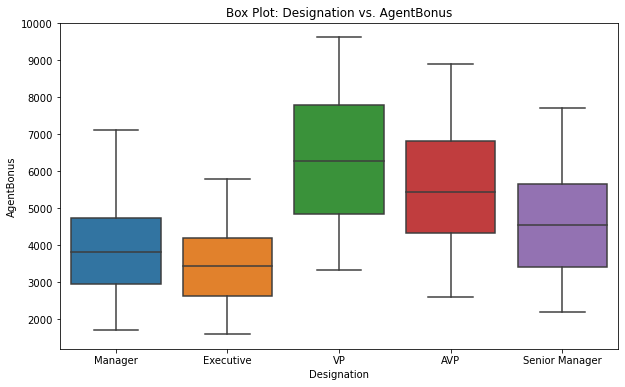

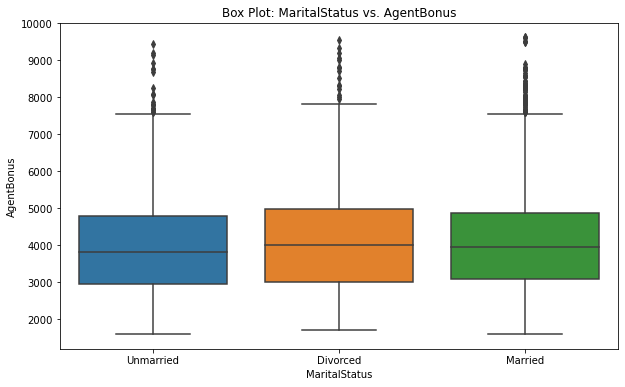

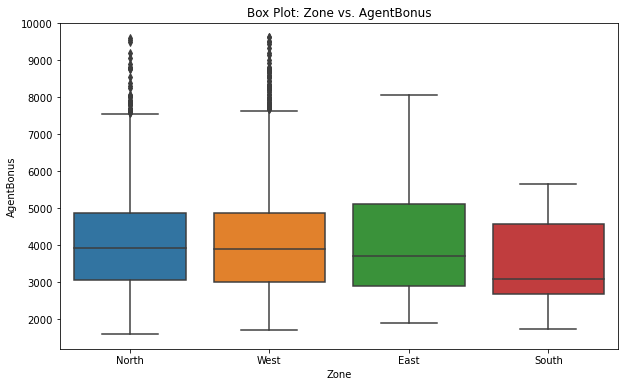

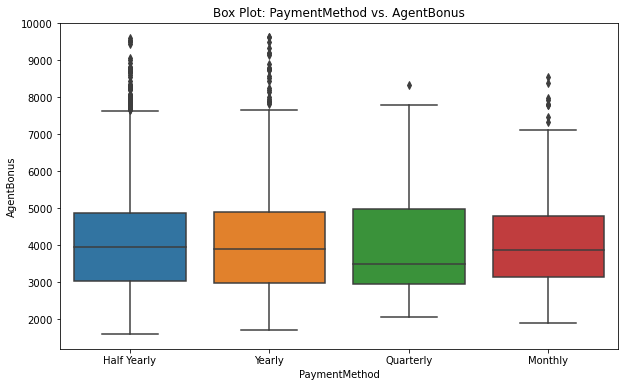

In [46]:
for var in categorical_values:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=SalesDf, x=var, y='AgentBonus')
    plt.xlabel(var)
    plt.ylabel('AgentBonus')
    plt.title(f'Box Plot: {var} vs. AgentBonus')
    plt.show()

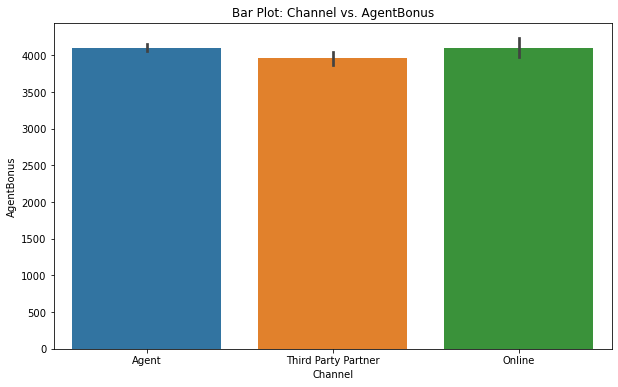

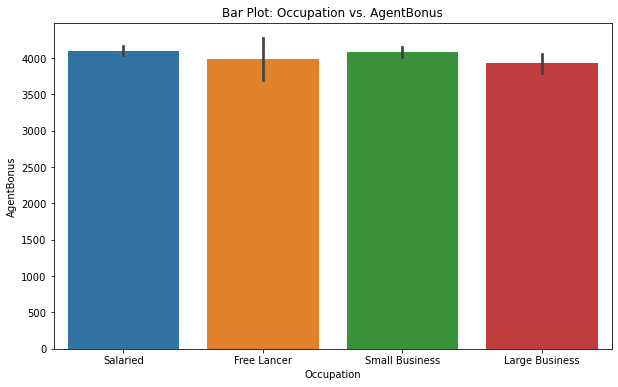

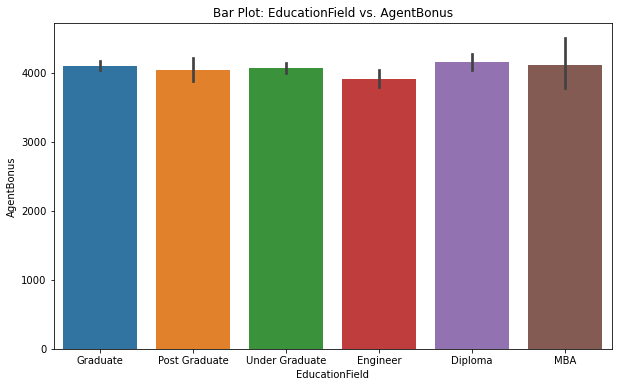

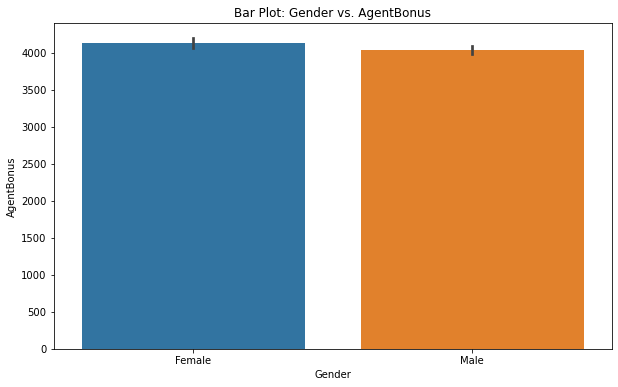

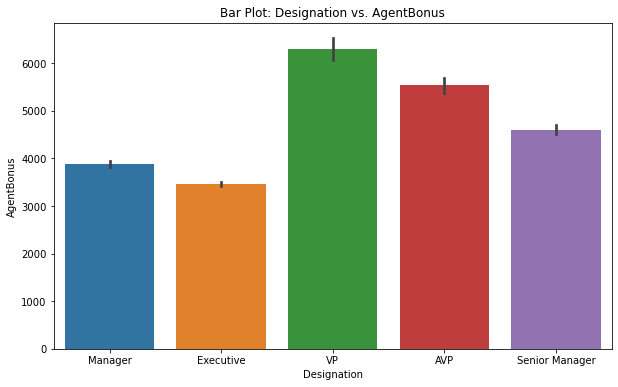

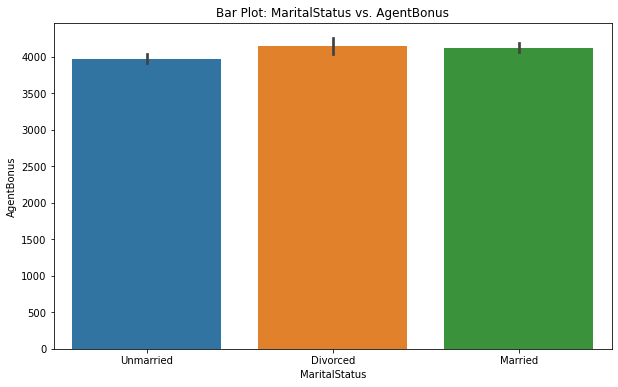

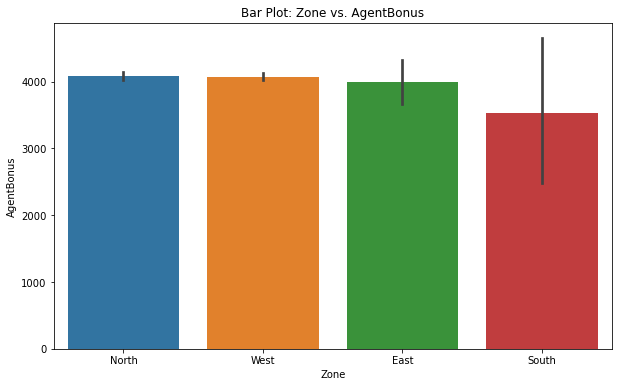

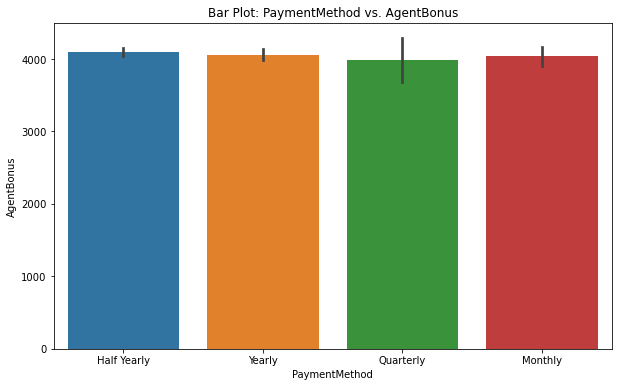

In [47]:
# Bar plots
for var in categorical_values:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=SalesDf, x=var, y='AgentBonus')
    plt.xlabel(var)
    plt.ylabel('AgentBonus')
    plt.title(f'Bar Plot: {var} vs. AgentBonus')
    plt.show()

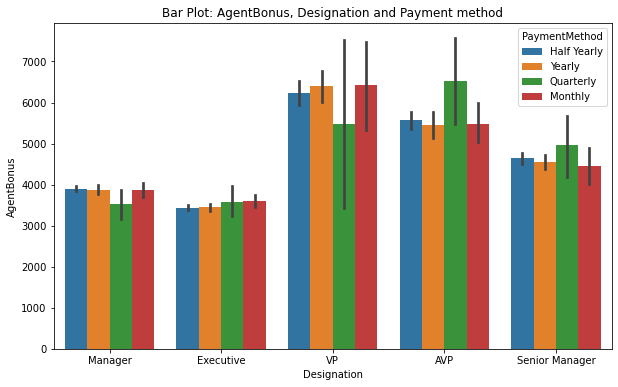

In [48]:
plt.figure(figsize=(10, 6))
sns.barplot(data=SalesDf, x='Designation', y='AgentBonus', hue='PaymentMethod')
plt.xlabel('Designation')
plt.ylabel('AgentBonus')
plt.title(f'Bar Plot: AgentBonus, Designation and Payment method')
plt.show()

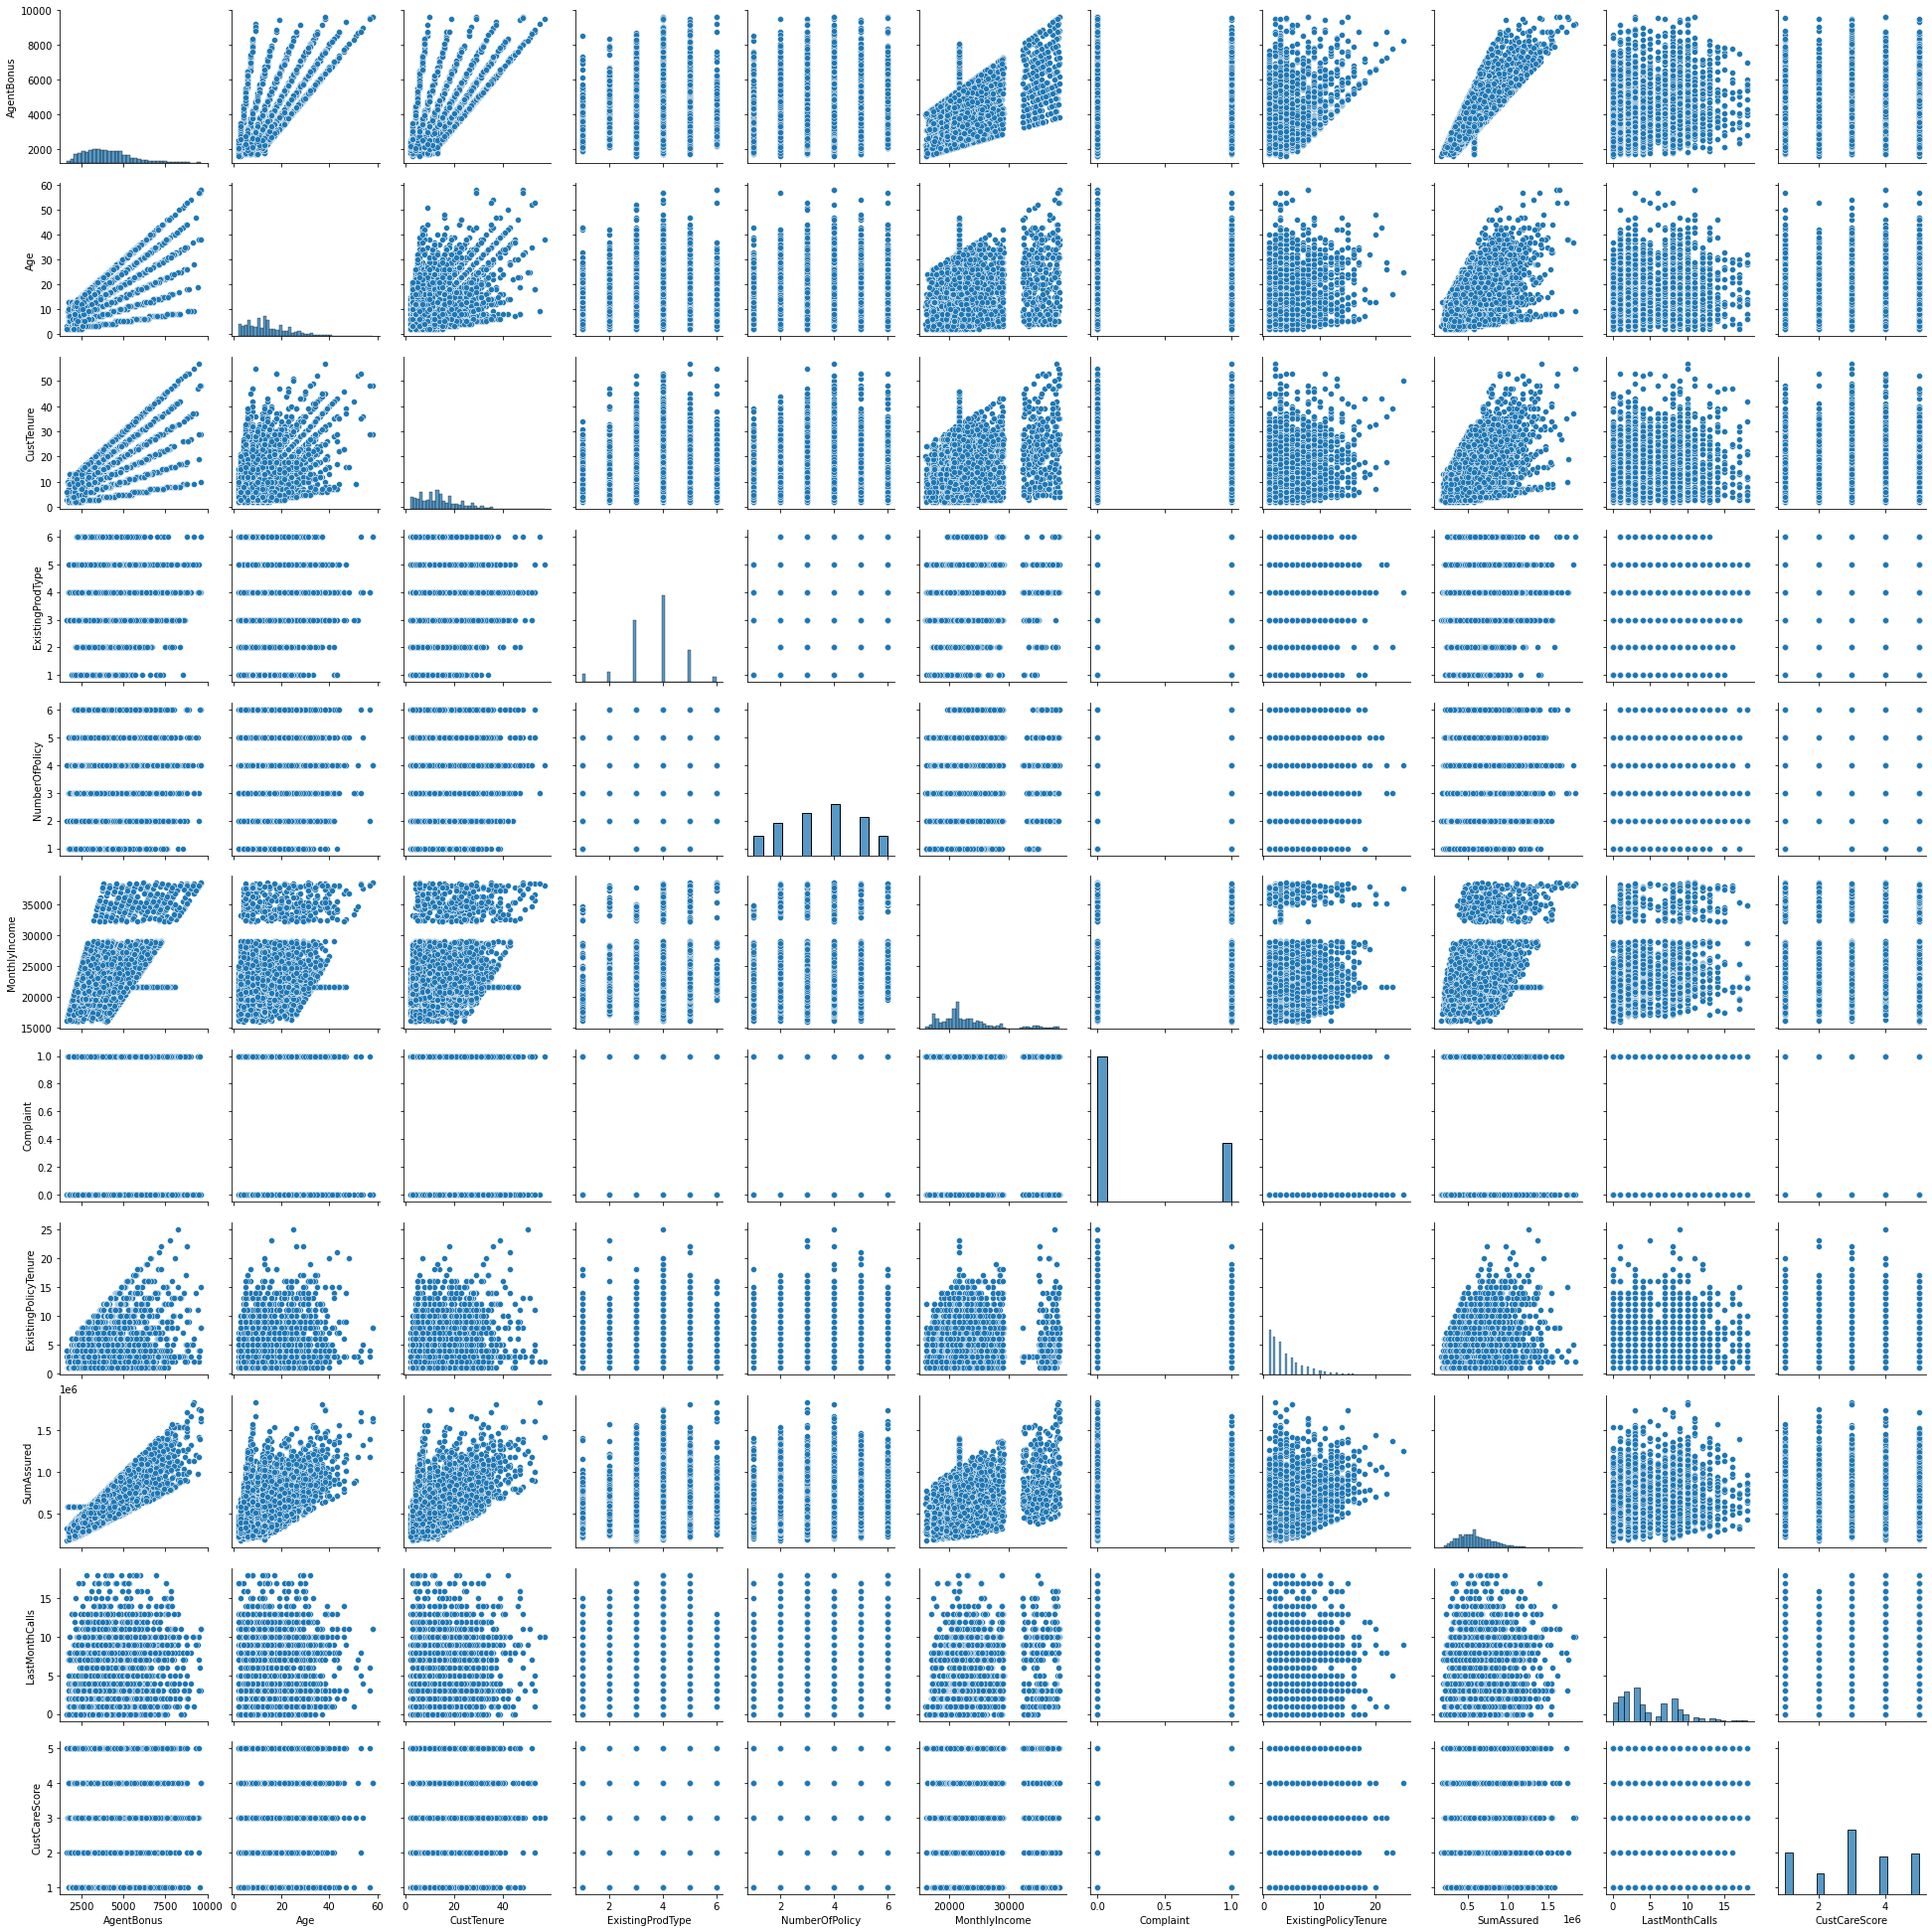

In [49]:
sns.pairplot(data=SalesDf,diag_kind='hist')

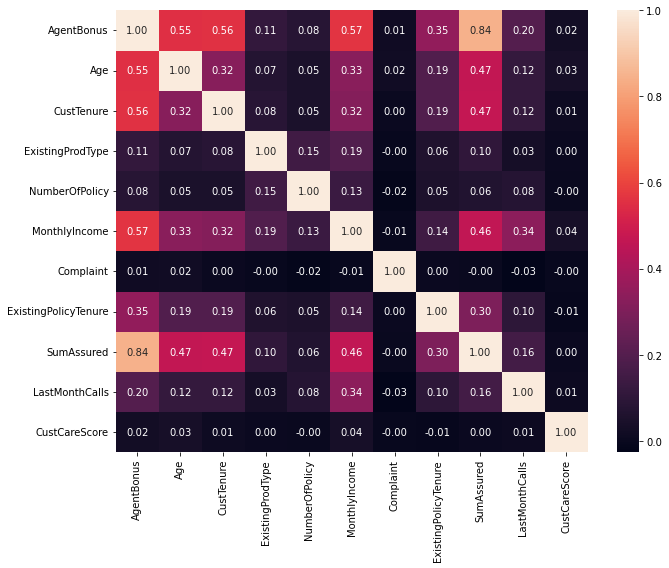

In [50]:
plt.figure(figsize=(10,8))
sns.heatmap(SalesDf.corr(),annot=True,fmt='.2f')
plt.tight_layout()
plt.show()

In [51]:
encoded_data = pd.get_dummies(SalesDf.copy(), columns=['Channel', 'Occupation', 'EducationField', 'Gender', 'Designation', 'MaritalStatus', 'Zone', 'PaymentMethod'], drop_first=True)

In [52]:
encoded_data

,AgentBonus,Age,CustTenure,ExistingProdType,NumberOfPolicy,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,LastMonthCalls,...,Designation_Senior Manager,Designation_VP,MaritalStatus_Married,MaritalStatus_Unmarried,Zone_North,Zone_South,Zone_West,PaymentMethod_Monthly,PaymentMethod_Quarterly,PaymentMethod_Yearly
0,4409,22.00,4.00,3,2.00,20993.00,1,2.00,806761.00,5,...,0,0,0,1,1,0,0,0,0,0
1,2214,11.00,2.00,4,4.00,20130.00,0,3.00,294502.00,7,...,0,0,0,0,1,0,0,0,0,1
2,4273,26.00,4.00,4,3.00,17090.00,1,2.00,578976.50,0,...,0,0,0,1,1,0,0,0,0,1
3,1791,11.00,13.00,3,3.00,17909.00,1,2.00,268635.00,0,...,0,0,0,0,0,0,1,0,0,0
4,2955,6.00,13.00,3,4.00,18468.00,0,4.00,366405.00,2,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4515,3953,4.00,8.00,4,2.00,26355.00,0,2.00,636473.00,9,...,1,0,0,1,0,0,1,0,0,1
4516,2939,9.00,9.00,2,2.00,20991.00,0,3.00,296813.00,1,...,0,0,1,0,1,0,0,0,0,1
4517,3792,23.00,23.00,5,5.00,21606.00,0,2.00,667371.00,4,...,0,0,0,1,1,0,0,0,0,0
4518,4816,10.00,10.00,4,2.00,20068.00,0,6.00,943999.00,1,...,0,0,0,1,0,0,1,0,0,0


In [53]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   AgentBonus                     4520 non-null   int64  
 1   Age                            4520 non-null   float64
 2   CustTenure                     4520 non-null   float64
 3   ExistingProdType               4520 non-null   int64  
 4   NumberOfPolicy                 4520 non-null   float64
 5   MonthlyIncome                  4520 non-null   float64
 6   Complaint                      4520 non-null   int64  
 7   ExistingPolicyTenure           4520 non-null   float64
 8   SumAssured                     4520 non-null   float64
 9   LastMonthCalls                 4520 non-null   int64  
 10  CustCareScore                  4520 non-null   float64
 11  Channel_Online                 4520 non-null   uint8  
 12  Channel_Third Party Partner    4520 non-null   u

In [54]:
LIC_df = encoded_data.copy()

In [55]:
LIC_df_X = LIC_df.drop('AgentBonus', axis=1)
LIC_df_Y = LIC_df[['AgentBonus']]

In [56]:
print(LIC_df_X.shape)
print(LIC_df_Y.shape)

(4520, 33)
(4520, 1)


In [57]:
LIC_df_X.head()

,Age,CustTenure,ExistingProdType,NumberOfPolicy,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,LastMonthCalls,CustCareScore,...,Designation_Senior Manager,Designation_VP,MaritalStatus_Married,MaritalStatus_Unmarried,Zone_North,Zone_South,Zone_West,PaymentMethod_Monthly,PaymentMethod_Quarterly,PaymentMethod_Yearly
0,22.00,4.00,3,2.00,20993.00,1,2.00,806761.00,5,2.00,...,0,0,0,1,1,0,0,0,0,0
1,11.00,2.00,4,4.00,20130.00,0,3.00,294502.00,7,3.00,...,0,0,0,0,1,0,0,0,0,1
2,26.00,4.00,4,3.00,17090.00,1,2.00,578976.50,0,3.00,...,0,0,0,1,1,0,0,0,0,1
3,11.00,13.00,3,3.00,17909.00,1,2.00,268635.00,0,5.00,...,0,0,0,0,0,0,1,0,0,0
4,6.00,13.00,3,4.00,18468.00,0,4.00,366405.00,2,5.00,...,0,0,0,0,0,0,1,0,0,0


In [58]:
LIC_df_Y.head()

,AgentBonus
0,4409
1,2214
2,4273
3,1791
4,2955


In [59]:
# For randomized data splitting
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(LIC_df_X, LIC_df_Y, test_size=0.30, random_state=42)

In [61]:
# invoke the LinearRegression function and find the bestfit model on training data
from sklearn.linear_model import LinearRegression

linearRegression_model = LinearRegression()
linearRegression_model.fit(X_train, y_train)

LinearRegression()

In [62]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, linearRegression_model.coef_[0][idx]))

The coefficient for Age is 22.554262499653785
The coefficient for CustTenure is 24.627158381457562
The coefficient for ExistingProdType is 56.30722615683109
The coefficient for NumberOfPolicy is -2.8235799236190378
The coefficient for MonthlyIncome is 0.031819706171858884
The coefficient for Complaint is 37.018062785861524
The coefficient for ExistingPolicyTenure is 35.83231443983518
The coefficient for SumAssured is 0.0034164777971448764
The coefficient for LastMonthCalls is -3.6660491297582154
The coefficient for CustCareScore is 3.155753063865669
The coefficient for Channel_Online is 50.11467376029983
The coefficient for Channel_Third Party Partner is 4.927806347351649
The coefficient for Occupation_Large Business is -505.35266605325285
The coefficient for Occupation_Salaried is -473.079217608049
The coefficient for Occupation_Small Business is -558.1735574356846
The coefficient for EducationField_Engineer is -41.27781250916865
The coefficient for EducationField_Graduate is -63.9115

In [63]:
# Let us check the intercept for the model

intercept = linearRegression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 1147.0287276439494


In [64]:
# R square on training data
linearRegression_model.score(X_train, y_train)

0.807375566469839

In [65]:
# R square on testing data
linearRegression_model.score(X_test, y_test)

0.8067489970948373

In [66]:
from sklearn import metrics
#RMSE on Training data
predicted_train=linearRegression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

612.163534066428

In [67]:
#RMSE on Testing data
predicted_test=linearRegression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

625.2491255774905

In [68]:
import statsmodels.api as sm

In [69]:
X_train=sm.add_constant(X_train)# This adds the constant term beta0 to the Simple Linear Regression.
X_test=sm.add_constant(X_test)

In [70]:
model = sm.OLS(y_train,X_train).fit()
model

In [71]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             AgentBonus   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     397.6
Date:                Thu, 10 Aug 2023   Prob (F-statistic):               0.00
Time:                        19:09:04   Log-Likelihood:                -24793.
No. Observations:                3164   AIC:                         4.965e+04
Df Residuals:                    3130   BIC:                         4.986e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          1147.0287    478.444      2.397      0.017     208.933    2085.124
Age                              22.5543      1.456     15.485      0.000      19.698      25.410
CustTenure                       24.6272      1.442     17.073      0.000      21.799      27.455
ExistingProdType                 56.3072     22.491      2.504      0.012      12.208     100.406
NumberOfPolicy                   -2.8236      8.008     -0.353      0.724     -18.526      12.879
MonthlyIncome                     0.0318      0.005      6.365      0.000       0.022       0.042
Complaint                        37.0181     24.331      1.521      0.128     -10.688      84.724
ExistingPolicyTenure             35.8323      3.503     10.228      0.000      28.963      42.701
SumAssured                        0.0034   6.05e-05     56.474      0.000       0.003       0.004
LastMonthCalls                   -3.6660      3.293     -1.113      0.266     -10.123       2.791
CustCareScore                     3.1558      8.027      0.393      0.694     -12.583      18.894
Channel_Online                   50.1147     36.885      1.359      0.174     -22.206     122.435
Channel_Third Party Partner       4.9278     28.487      0.173      0.863     -50.927      60.783
Occupation_Large Business      -505.3527    468.929     -1.078      0.281   -1424.793     414.087
Occupation_Salaried            -473.0792    439.184     -1.077      0.281   -1334.198     388.039
Occupation_Small Business      -558.1736    449.071     -1.243      0.214   -1438.678     322.331
EducationField_Engineer         -41.2778    177.964     -0.232      0.817    -390.217     307.661
EducationField_Graduate         -63.9115    100.069     -0.639      0.523    -260.119     132.296
EducationField_MBA               22.9842    135.252      0.170      0.865    -242.207     288.176
EducationField_Post Graduate   -116.1063    110.119     -1.054      0.292    -332.019      99.807
EducationField_Under Graduate    11.2879     39.590      0.285      0.776     -66.337      88.913
Gender_Male                      12.8507     22.614      0.568      0.570     -31.490      57.191
Designation_Executive          -464.9181     64.783     -7.177      0.000    -591.940    -337.896
Designation_Manager            -440.9625     55.340     -7.968      0.000    -549.468    -332.457
Designation_Senior Manager     -270.3271     52.431     -5.156      0.000    -373.130    -167.524
Designation_VP                  -30.5612     72.188     -0.423      0.672    -172.101     110.979
MaritalStatus_Married           -45.1682     30.746     -1.469      0.142    -105.452      15.115
MaritalStatus_Unmarried          -2.8193     32.929     -0.086      0.932     -67.384      61.746
Zone_North                       -6.5860     

We will transform the data using Standard Scalar and then interpret the results.

In [72]:
from sklearn.preprocessing import StandardScaler

In [73]:
X_train.columns

Index(['const', 'Age', 'CustTenure', 'ExistingProdType', 'NumberOfPolicy',
       'MonthlyIncome', 'Complaint', 'ExistingPolicyTenure', 'SumAssured',
       'LastMonthCalls', 'CustCareScore', 'Channel_Online',
       'Channel_Third Party Partner', 'Occupation_Large Business',
       'Occupation_Salaried', 'Occupation_Small Business',
       'EducationField_Engineer', 'EducationField_Graduate',
       'EducationField_MBA', 'EducationField_Post Graduate',
       'EducationField_Under Graduate', 'Gender_Male', 'Designation_Executive',
       'Designation_Manager', 'Designation_Senior Manager', 'Designation_VP',
       'MaritalStatus_Married', 'MaritalStatus_Unmarried', 'Zone_North',
       'Zone_South', 'Zone_West', 'PaymentMethod_Monthly',
       'PaymentMethod_Quarterly', 'PaymentMethod_Yearly'],
      dtype='object')

In [74]:
continuous_features = ['Age', 'CustTenure', 'ExistingProdType', 'NumberOfPolicy',
                       'MonthlyIncome', 'Complaint', 'ExistingPolicyTenure', 'SumAssured','LastMonthCalls', 'CustCareScore']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform the continuous features
X_train[continuous_features] = scaler.fit_transform(X_train[continuous_features])
X_test[continuous_features] = scaler.fit_transform(X_test[continuous_features])

In [75]:
print(X_train.shape)
print(X_test.shape)

(3164, 34)
(1356, 34)


In [76]:
X_train.head()

,const,Age,CustTenure,ExistingProdType,NumberOfPolicy,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,LastMonthCalls,...,Designation_Senior Manager,Designation_VP,MaritalStatus_Married,MaritalStatus_Unmarried,Zone_North,Zone_South,Zone_West,PaymentMethod_Monthly,PaymentMethod_Quarterly,PaymentMethod_Yearly
3894,1.00,2.81,0.63,0.29,-1.10,2.41,-0.63,-0.33,2.50,-1.00,...,0,0,0,1,0,0,1,0,0,0
3482,1.00,-0.97,2.23,0.29,1.68,0.01,1.58,0.88,0.14,0.09,...,0,0,0,1,1,0,0,0,0,0
4152,1.00,-0.17,1.20,1.28,-1.10,-0.38,-0.63,-0.64,-0.71,-0.18,...,0,0,0,1,1,0,0,0,0,1
4013,1.00,1.21,0.06,0.29,0.99,0.92,-0.63,-0.64,0.80,0.91,...,1,0,1,0,1,0,0,0,0,0
748,1.00,-1.43,-0.17,-0.69,-0.40,-0.94,1.58,-0.94,-0.76,0.64,...,0,0,1,0,0,0,1,0,0,0


In [77]:
X_test.head()

,const,Age,CustTenure,ExistingProdType,NumberOfPolicy,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,LastMonthCalls,...,Designation_Senior Manager,Designation_VP,MaritalStatus_Married,MaritalStatus_Unmarried,Zone_North,Zone_South,Zone_West,PaymentMethod_Monthly,PaymentMethod_Quarterly,PaymentMethod_Yearly
2879,1.00,-1.16,-0.71,1.31,-0.37,-0.28,-0.64,1.84,0.46,-1.02,...,0,0,0,0,0,0,1,0,0,1
800,1.00,-0.94,-0.59,0.33,0.99,-0.65,-0.64,-0.32,-0.17,-0.16,...,0,0,0,0,0,0,1,0,0,1
3362,1.00,0.42,0.44,0.33,1.67,-0.19,-0.64,1.53,1.05,-0.44,...,0,0,1,0,0,0,1,0,0,0
2342,1.00,-0.37,-0.36,1.31,-0.37,0.28,-0.64,0.60,-0.99,1.27,...,0,0,0,0,1,0,0,0,0,1
4277,1.00,0.31,0.78,1.31,1.67,-0.36,1.57,0.30,0.18,-1.02,...,0,0,0,1,1,0,0,0,0,1


In [78]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
const,3164.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00
Age,3164.00,-0.00,1.00,-1.43,-0.74,-0.17,0.52,4.98
CustTenure,3164.00,0.00,1.00,-1.43,-0.74,-0.17,0.52,4.87
ExistingProdType,3164.00,-0.00,1.00,-2.66,-0.69,0.29,0.29,2.27
NumberOfPolicy,3164.00,-0.00,1.00,-1.80,-1.10,0.29,0.99,1.68
MonthlyIncome,3164.00,0.00,1.00,-1.43,-0.63,-0.26,0.36,3.25
Complaint,3164.00,-0.00,1.00,-0.63,-0.63,-0.63,1.58,1.58
ExistingPolicyTenure,3164.00,-0.00,1.00,-0.94,-0.64,-0.33,0.27,6.33
SumAssured,3164.00,0.00,1.00,-1.89,-0.73,-0.17,0.56,5.02
LastMonthCalls,3164.00,0.00,1.00,-1.27,-0.72,-0.45,0.91,3.63


#### RFE

In [79]:
from sklearn.feature_selection import RFE

In [80]:
# Running RFE with the output number of the variable equal to 33
lr_Std = LinearRegression()
# lr_Std.fit(X_train, y_train)
rfe = RFE(estimator=lr_Std, n_features_to_select=33)             
rfe = rfe.fit(X_train, y_train)

In [81]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('const', False, 2),
 ('Age', True, 1),
 ('CustTenure', True, 1),
 ('ExistingProdType', True, 1),
 ('NumberOfPolicy', True, 1),
 ('MonthlyIncome', True, 1),
 ('Complaint', True, 1),
 ('ExistingPolicyTenure', True, 1),
 ('SumAssured', True, 1),
 ('LastMonthCalls', True, 1),
 ('CustCareScore', True, 1),
 ('Channel_Online', True, 1),
 ('Channel_Third Party Partner', True, 1),
 ('Occupation_Large Business', True, 1),
 ('Occupation_Salaried', True, 1),
 ('Occupation_Small Business', True, 1),
 ('EducationField_Engineer', True, 1),
 ('EducationField_Graduate', True, 1),
 ('EducationField_MBA', True, 1),
 ('EducationField_Post Graduate', True, 1),
 ('EducationField_Under Graduate', True, 1),
 ('Gender_Male', True, 1),
 ('Designation_Executive', True, 1),
 ('Designation_Manager', True, 1),
 ('Designation_Senior Manager', True, 1),
 ('Designation_VP', True, 1),
 ('MaritalStatus_Married', True, 1),
 ('MaritalStatus_Unmarried', True, 1),
 ('Zone_North', True, 1),
 ('Zone_South', True, 1),
 ('Zon

In [82]:
# Selecting the variables which are in support

col_sup = X_train.columns[rfe.support_]
col_sup

Index(['Age', 'CustTenure', 'ExistingProdType', 'NumberOfPolicy',
       'MonthlyIncome', 'Complaint', 'ExistingPolicyTenure', 'SumAssured',
       'LastMonthCalls', 'CustCareScore', 'Channel_Online',
       'Channel_Third Party Partner', 'Occupation_Large Business',
       'Occupation_Salaried', 'Occupation_Small Business',
       'EducationField_Engineer', 'EducationField_Graduate',
       'EducationField_MBA', 'EducationField_Post Graduate',
       'EducationField_Under Graduate', 'Gender_Male', 'Designation_Executive',
       'Designation_Manager', 'Designation_Senior Manager', 'Designation_VP',
       'MaritalStatus_Married', 'MaritalStatus_Unmarried', 'Zone_North',
       'Zone_South', 'Zone_West', 'PaymentMethod_Monthly',
       'PaymentMethod_Quarterly', 'PaymentMethod_Yearly'],
      dtype='object')

In [83]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col_sup]

<b>After passing the arbitary selected columns by RFE we will manually evaluate each models p-value and VIF value. Unless we find the acceptable range for p-values and VIF we keep dropping the variables one at a time based on below criteria.</b>

High p-value High VIF : Drop the variable </br>
High p-value Low VIF or Low p-value High VIF : Drop the variable with high p-value first </br>
Low p-value Low VIF : accept the variable </br>

<b>Checking VIF </b> </br>
Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. We will initially checking vif for continuous features only.

In [84]:
X_train_rfe_cat = X_train_rfe.select_dtypes(include=['float64'])

In [85]:
X_train_rfe_cat.columns

Index(['Age', 'CustTenure', 'ExistingProdType', 'NumberOfPolicy',
       'MonthlyIncome', 'Complaint', 'ExistingPolicyTenure', 'SumAssured',
       'LastMonthCalls', 'CustCareScore'],
      dtype='object')

In [86]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [87]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_cat.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_cat.values, i) for i in range(X_train_rfe_cat.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,SumAssured,1.71
4,MonthlyIncome,1.47
0,Age,1.34
1,CustTenure,1.31
8,LastMonthCalls,1.15
6,ExistingPolicyTenure,1.11
2,ExistingProdType,1.05
3,NumberOfPolicy,1.04
5,Complaint,1.00
9,CustCareScore,1.00


So, it is seen that VIF values for continuous features are less than 5 only. So will train model and will drop features on the basis of p-value

In [88]:
X_train_rfe.shape

(3164, 33)

In [89]:
X_train_rfe.columns

Index(['Age', 'CustTenure', 'ExistingProdType', 'NumberOfPolicy',
       'MonthlyIncome', 'Complaint', 'ExistingPolicyTenure', 'SumAssured',
       'LastMonthCalls', 'CustCareScore', 'Channel_Online',
       'Channel_Third Party Partner', 'Occupation_Large Business',
       'Occupation_Salaried', 'Occupation_Small Business',
       'EducationField_Engineer', 'EducationField_Graduate',
       'EducationField_MBA', 'EducationField_Post Graduate',
       'EducationField_Under Graduate', 'Gender_Male', 'Designation_Executive',
       'Designation_Manager', 'Designation_Senior Manager', 'Designation_VP',
       'MaritalStatus_Married', 'MaritalStatus_Unmarried', 'Zone_North',
       'Zone_South', 'Zone_West', 'PaymentMethod_Monthly',
       'PaymentMethod_Quarterly', 'PaymentMethod_Yearly'],
      dtype='object')

In [90]:
# Adding a constant variable and Build a first fitted model
  
X_train_rfec = sm.add_constant(X_train_rfe)
lm_rfe = sm.OLS(y_train,X_train_rfec).fit()

#Summary of linear model
print(lm_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:             AgentBonus   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     397.6
Date:                Thu, 10 Aug 2023   Prob (F-statistic):               0.00
Time:                        19:09:05   Log-Likelihood:                -24793.
No. Observations:                3164   AIC:                         4.965e+04
Df Residuals:                    3130   BIC:                         4.986e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

<b> Here we observe that p-value is significantly very high for many variables. So we will again run RFE by taking less features and will check

In [91]:
# Running RFE with the output number of the variable equal to 23
lr_Std = LinearRegression()
# lr_Std.fit(X_train, y_train)
rfe = RFE(estimator=lr_Std, n_features_to_select=23)             
rfe = rfe.fit(X_train, y_train)

In [92]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('const', False, 12),
 ('Age', True, 1),
 ('CustTenure', True, 1),
 ('ExistingProdType', True, 1),
 ('NumberOfPolicy', False, 9),
 ('MonthlyIncome', True, 1),
 ('Complaint', False, 2),
 ('ExistingPolicyTenure', True, 1),
 ('SumAssured', True, 1),
 ('LastMonthCalls', False, 3),
 ('CustCareScore', False, 8),
 ('Channel_Online', True, 1),
 ('Channel_Third Party Partner', False, 6),
 ('Occupation_Large Business', True, 1),
 ('Occupation_Salaried', True, 1),
 ('Occupation_Small Business', True, 1),
 ('EducationField_Engineer', True, 1),
 ('EducationField_Graduate', True, 1),
 ('EducationField_MBA', True, 1),
 ('EducationField_Post Graduate', True, 1),
 ('EducationField_Under Graduate', False, 5),
 ('Gender_Male', False, 4),
 ('Designation_Executive', True, 1),
 ('Designation_Manager', True, 1),
 ('Designation_Senior Manager', True, 1),
 ('Designation_VP', True, 1),
 ('MaritalStatus_Married', True, 1),
 ('MaritalStatus_Unmarried', False, 10),
 ('Zone_North', False, 7),
 ('Zone_South', True,

In [93]:
# Selecting the variables which are in support

col_sup = X_train.columns[rfe.support_]
col_sup

Index(['Age', 'CustTenure', 'ExistingProdType', 'MonthlyIncome',
       'ExistingPolicyTenure', 'SumAssured', 'Channel_Online',
       'Occupation_Large Business', 'Occupation_Salaried',
       'Occupation_Small Business', 'EducationField_Engineer',
       'EducationField_Graduate', 'EducationField_MBA',
       'EducationField_Post Graduate', 'Designation_Executive',
       'Designation_Manager', 'Designation_Senior Manager', 'Designation_VP',
       'MaritalStatus_Married', 'Zone_South', 'PaymentMethod_Monthly',
       'PaymentMethod_Quarterly', 'PaymentMethod_Yearly'],
      dtype='object')

In [94]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col_sup]

In [95]:
# Adding a constant variable and Build again the fitted model
  
X_train_rfec = sm.add_constant(X_train_rfe)
lm_rfe = sm.OLS(y_train,X_train_rfec).fit()

#Summary of linear model
print(lm_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:             AgentBonus   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     571.2
Date:                Thu, 10 Aug 2023   Prob (F-statistic):               0.00
Time:                        19:09:05   Log-Likelihood:                -24795.
No. Observations:                3164   AIC:                         4.964e+04
Df Residuals:                    3140   BIC:                         4.978e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

<b>Dropping the variable and updating the model multiple times. We want features with p value less than 0.05 </b>

Dropping EducationField_MBA model as it has very high p value

In [96]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe1 = X_train_rfe.drop('EducationField_MBA', 1,)

# Adding a constant variable and Build a second fitted model

X_train_rfe1c = sm.add_constant(X_train_rfe1)
lm_rfe1 = sm.OLS(y_train, X_train_rfe1c).fit()

#Summary of linear model
print(lm_rfe1.summary())

                            OLS Regression Results                            
Dep. Variable:             AgentBonus   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     597.4
Date:                Thu, 10 Aug 2023   Prob (F-statistic):               0.00
Time:                        19:09:05   Log-Likelihood:                -24795.
No. Observations:                3164   AIC:                         4.964e+04
Df Residuals:                    3141   BIC:                         4.978e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

Dropping EducationField_Engineer model as it has very high p value

In [97]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe2 = X_train_rfe1.drop('EducationField_Engineer', 1,)

# Adding a constant variable and Build a second fitted model

X_train_rfe2c = sm.add_constant(X_train_rfe2)
lm_rfe2 = sm.OLS(y_train, X_train_rfe2c).fit()

#Summary of linear model
print(lm_rfe2.summary())

                            OLS Regression Results                            
Dep. Variable:             AgentBonus   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     626.0
Date:                Thu, 10 Aug 2023   Prob (F-statistic):               0.00
Time:                        19:09:05   Log-Likelihood:                -24795.
No. Observations:                3164   AIC:                         4.963e+04
Df Residuals:                    3142   BIC:                         4.977e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

Dropping Designation_VP model as it has very high p value

In [98]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe3 = X_train_rfe2.drop('Designation_VP', 1,)

# Adding a constant variable and Build a second fitted model

X_train_rfe3c = sm.add_constant(X_train_rfe3)
lm_rfe3 = sm.OLS(y_train, X_train_rfe3c).fit()

#Summary of linear model
print(lm_rfe3.summary())

                            OLS Regression Results                            
Dep. Variable:             AgentBonus   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     657.4
Date:                Thu, 10 Aug 2023   Prob (F-statistic):               0.00
Time:                        19:09:05   Log-Likelihood:                -24795.
No. Observations:                3164   AIC:                         4.963e+04
Df Residuals:                    3143   BIC:                         4.976e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

Dropping Zone_South model as it has very high p value

In [99]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe4 = X_train_rfe3.drop('Zone_South', 1,)

# Adding a constant variable and Build a second fitted model

X_train_rfe4c = sm.add_constant(X_train_rfe4)
lm_rfe4 = sm.OLS(y_train, X_train_rfe4c).fit()

#Summary of linear model
print(lm_rfe4.summary())

                            OLS Regression Results                            
Dep. Variable:             AgentBonus   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     692.1
Date:                Thu, 10 Aug 2023   Prob (F-statistic):               0.00
Time:                        19:09:05   Log-Likelihood:                -24796.
No. Observations:                3164   AIC:                         4.963e+04
Df Residuals:                    3144   BIC:                         4.975e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

Dropping EducationField_Graduate model as it has very high p value

In [100]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe5 = X_train_rfe4.drop('EducationField_Graduate', 1,)

# Adding a constant variable and Build a second fitted model

X_train_rfe5c = sm.add_constant(X_train_rfe5)
lm_rfe5 = sm.OLS(y_train, X_train_rfe5c).fit()

#Summary of linear model
print(lm_rfe5.summary())

                            OLS Regression Results                            
Dep. Variable:             AgentBonus   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     730.5
Date:                Thu, 10 Aug 2023   Prob (F-statistic):               0.00
Time:                        19:09:05   Log-Likelihood:                -24796.
No. Observations:                3164   AIC:                         4.963e+04
Df Residuals:                    3145   BIC:                         4.975e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

Dropping EducationField_Post Graduate model as it has very high p value

In [101]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe6 = X_train_rfe5.drop('EducationField_Post Graduate', 1,)

# Adding a constant variable and Build a second fitted model

X_train_rfe6c = sm.add_constant(X_train_rfe6)
lm_rfe6 = sm.OLS(y_train, X_train_rfe6c).fit()

#Summary of linear model
print(lm_rfe6.summary())

                            OLS Regression Results                            
Dep. Variable:             AgentBonus   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     773.3
Date:                Thu, 10 Aug 2023   Prob (F-statistic):               0.00
Time:                        19:09:05   Log-Likelihood:                -24797.
No. Observations:                3164   AIC:                         4.963e+04
Df Residuals:                    3146   BIC:                         4.974e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Dropping Occupation_Salaried model as it has very high p value

In [102]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe7 = X_train_rfe6.drop('Occupation_Salaried', 1,)

# Adding a constant variable and Build a second fitted model

X_train_rfe7c = sm.add_constant(X_train_rfe7)
lm_rfe7 = sm.OLS(y_train, X_train_rfe7c).fit()

#Summary of linear model
print(lm_rfe7.summary())

                            OLS Regression Results                            
Dep. Variable:             AgentBonus   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     821.5
Date:                Thu, 10 Aug 2023   Prob (F-statistic):               0.00
Time:                        19:09:05   Log-Likelihood:                -24797.
No. Observations:                3164   AIC:                         4.963e+04
Df Residuals:                    3147   BIC:                         4.973e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Dropping Occupation_Large Business model as it has very high p value

In [103]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe8 = X_train_rfe7.drop('Occupation_Large Business', 1,)

# Adding a constant variable and Build a second fitted model

X_train_rfe8c = sm.add_constant(X_train_rfe8)
lm_rfe8 = sm.OLS(y_train, X_train_rfe8c).fit()

#Summary of linear model
print(lm_rfe8.summary())

                            OLS Regression Results                            
Dep. Variable:             AgentBonus   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     876.6
Date:                Thu, 10 Aug 2023   Prob (F-statistic):               0.00
Time:                        19:09:05   Log-Likelihood:                -24797.
No. Observations:                3164   AIC:                         4.963e+04
Df Residuals:                    3148   BIC:                         4.972e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Dropping Occupation_Small Business model as it has very high p value

In [104]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe9 = X_train_rfe8.drop('Occupation_Small Business', 1,)

# Adding a constant variable and Build a second fitted model

X_train_rfe9c = sm.add_constant(X_train_rfe9)
lm_rfe9 = sm.OLS(y_train, X_train_rfe9c).fit()

#Summary of linear model
print(lm_rfe9.summary())

                            OLS Regression Results                            
Dep. Variable:             AgentBonus   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     939.4
Date:                Thu, 10 Aug 2023   Prob (F-statistic):               0.00
Time:                        19:09:05   Log-Likelihood:                -24798.
No. Observations:                3164   AIC:                         4.963e+04
Df Residuals:                    3149   BIC:                         4.972e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Dropping Channel_Online model as it has very high p value

In [105]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe10 = X_train_rfe9.drop('Channel_Online', 1,)

# Adding a constant variable and Build a second fitted model

X_train_rfe10c = sm.add_constant(X_train_rfe10)
lm_rfe10 = sm.OLS(y_train, X_train_rfe10c).fit()

#Summary of linear model
print(lm_rfe10.summary())

                            OLS Regression Results                            
Dep. Variable:             AgentBonus   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     1011.
Date:                Thu, 10 Aug 2023   Prob (F-statistic):               0.00
Time:                        19:09:05   Log-Likelihood:                -24798.
No. Observations:                3164   AIC:                         4.962e+04
Df Residuals:                    3150   BIC:                         4.971e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Dropping PaymentMethod_Quarterly model as it has very high p value

In [106]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe11 = X_train_rfe10.drop('PaymentMethod_Quarterly', 1,)

# Adding a constant variable and Build a second fitted model

X_train_rfe11c = sm.add_constant(X_train_rfe11)
lm_rfe11 = sm.OLS(y_train, X_train_rfe11c).fit()

#Summary of linear model
print(lm_rfe11.summary())

                            OLS Regression Results                            
Dep. Variable:             AgentBonus   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     1095.
Date:                Thu, 10 Aug 2023   Prob (F-statistic):               0.00
Time:                        19:09:05   Log-Likelihood:                -24800.
No. Observations:                3164   AIC:                         4.963e+04
Df Residuals:                    3151   BIC:                         4.970e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [107]:
#RMSE on Training data
predicted_train=lm_rfe11.predict(X_train_rfe11c)
trainRSME = np.sqrt(metrics.mean_squared_error(y_train,predicted_train))
print(trainRSME)

613.4651443964917


In [108]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe11.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe11.values, i) for i in range(X_train_rfe11.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,ExistingProdType,3.00
11,PaymentMethod_Yearly,2.56
10,PaymentMethod_Monthly,2.03
6,Designation_Executive,2.01
9,MaritalStatus_Married,1.93
3,MonthlyIncome,1.77
5,SumAssured,1.72
7,Designation_Manager,1.56
0,Age,1.34
1,CustTenure,1.32


#### Now we can have p-value < 0.05 and VIF also < 5. So, finalizing this variables to be used in further analysis

In [109]:
lm_rfe11

In [110]:
X_train_rfe11c.columns

Index(['const', 'Age', 'CustTenure', 'ExistingProdType', 'MonthlyIncome',
       'ExistingPolicyTenure', 'SumAssured', 'Designation_Executive',
       'Designation_Manager', 'Designation_Senior Manager',
       'MaritalStatus_Married', 'PaymentMethod_Monthly',
       'PaymentMethod_Yearly'],
      dtype='object')

In [111]:
# Adding constant
X_test_1 = sm.add_constant(X_test)

X_test_new = X_test_1[X_train_rfe11c.columns]

In [112]:
X_test_new.columns

Index(['const', 'Age', 'CustTenure', 'ExistingProdType', 'MonthlyIncome',
       'ExistingPolicyTenure', 'SumAssured', 'Designation_Executive',
       'Designation_Manager', 'Designation_Senior Manager',
       'MaritalStatus_Married', 'PaymentMethod_Monthly',
       'PaymentMethod_Yearly'],
      dtype='object')

In [113]:
# Making predictions using the final model
y_pred = lm_rfe11.predict(X_test_new)

### Model Evaluation

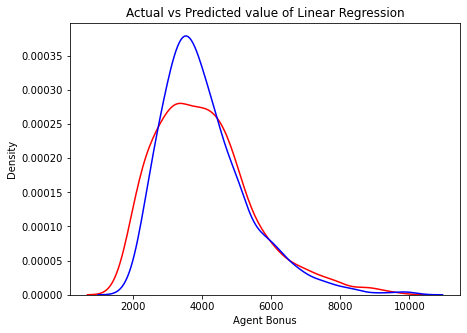

In [114]:
# Plotting y_test and y_pred
plt.figure(figsize=(7,5))
ax1=sns.distplot(y_test,hist=False,color='r',label='Actual Value')
sns.distplot(y_pred,hist=False,color='b',label='Predicted Value')
plt.title('Actual vs Predicted value of Linear Regression')
plt.xlabel('Agent Bonus')
plt.show()

Text(0, 0.5, 'y_pred')

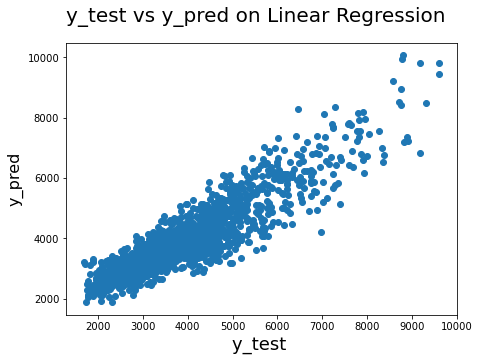

In [115]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure(figsize=(7,5))
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred on Linear Regression', fontsize=20)   
plt.xlabel('y_test ', fontsize=18)                       
plt.ylabel('y_pred', fontsize=16)

In [116]:
from sklearn.metrics import r2_score

In [117]:
r2_score(y_test, y_pred)

0.8077893966479964

In [118]:
#RMSE on Testing data
predicted_test=lm_rfe11.predict(X_test_new)
testRSME = np.sqrt(metrics.mean_squared_error(y_test,predicted_test))
print(testRSME)

623.5637868287071


The R2 score of Training set is 0.807 and Test set is 0.808 which is quite close. Hence, We can say that our model is good enough to predict the Agent Bonus.

Equation of the line is:

In [119]:
params_array = np.array(lm_rfe11.params.reset_index())
print('Equation of line is:')
for idx, (i, j) in enumerate(params_array):
    if idx == len(params_array) - 1:  # Check if it's the last iteration
        print('({}) * {}'.format(round(j, 2), i), end=' ')
    else:
        print('({}) * {} +'.format(round(j, 2), i), end=' ')


Equation of line is:
(4475.4) * const + (198.71) * Age + (215.22) * CustTenure + (49.23) * ExistingProdType + (148.51) * MonthlyIncome + (117.38) * ExistingPolicyTenure + (815.58) * SumAssured + (-450.38) * Designation_Executive + (-432.58) * Designation_Manager + (-267.11) * Designation_Senior Manager + (-44.42) * MaritalStatus_Married + (189.1) * PaymentMethod_Monthly + (-70.93) * PaymentMethod_Yearly 

In [120]:
resultsDf = pd.DataFrame({'Train RSME':[trainRSME], 'Test RSME':[testRSME]}, index=['Linear Regression Model'])
resultsDf

,Train RSME,Test RSME
Linear Regression Model,613.47,623.56


<b>-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

### Lasso Regression

In [121]:
from sklearn.linear_model import Lasso

In [122]:
X_train_rfe11c = X_train_rfe11c.drop(columns=['const'], axis=1)
X_test_new = X_test_new.drop(columns=['const'], axis=1)

In [123]:
# Initialize the Lasso model
lasso_model = Lasso(alpha=1.0)

# Train the model on the training data
lasso_model.fit(X_train_rfe11c, y_train)

Lasso()

In [124]:
# Get the coefficients and intercept
coefficients = lasso_model.coef_
intercept = lasso_model.intercept_

In [125]:
coefficients

array([ 199.01870739,  216.31362241,   26.72004937,  171.59817429,
        117.11031381,  816.80649848, -363.45039056, -358.83252528,
       -205.72313891,  -39.88360453,  134.35044602,  -42.3755875 ])

In [126]:
intercept

array([4400.95310479])

In [127]:
# Make predictions on the training set
y_train_pred = lasso_model.predict(X_train_rfe11c)

In [128]:
# Make predictions on the test set
trainRSME = metrics.mean_squared_error(y_train, y_train_pred, squared=False)
print(trainRSME)

613.7167586679318


In [129]:
# Make predictions on the test set
y_pred = lasso_model.predict(X_test_new)

In [130]:
testRSME = metrics.mean_squared_error(y_test, y_pred, squared=False)
print("Test RMSE:", testRSME)

Test RMSE: 623.7249504582988


In [131]:
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_pred)

print("Train R-squared:", r2_train)
print("Test R-squared:", r2_test)

Train R-squared: 0.806396845738881
Test R-squared: 0.8076900279473938


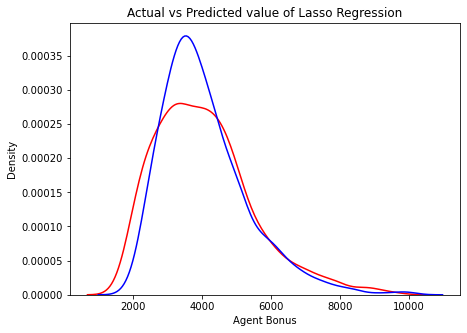

In [132]:
# Plotting y_test and y_pred
plt.figure(figsize=(7,5))
ax1=sns.distplot(y_test,hist=False,color='r',label='Actual Value')
sns.distplot(y_pred,hist=False,color='b',label='Predicted Value')
plt.title('Actual vs Predicted value of Lasso Regression')
plt.xlabel('Agent Bonus')
plt.show()

Text(0, 0.5, 'y_pred')

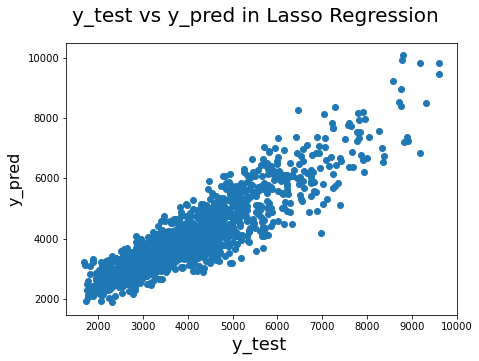

In [133]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure(figsize=(7,5))
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred in Lasso Regression', fontsize=20)   
plt.xlabel('y_test ', fontsize=18)                       
plt.ylabel('y_pred', fontsize=16)

In [134]:
intercept = float(lasso_model.intercept_)
coefficients = [float(coef) for coef in lasso_model.coef_]
feature_names = X_train_rfe11c.columns
# Print the line equation with original variable names
print("Line equation:")
print(f"Agent_Bonus = {intercept:.2f}", end="")
for idx, coef in enumerate(coefficients):
    variable_name = feature_names[idx] if idx < len(feature_names) else f'x{idx+1}'
    print(f" + ({coef:.2f}) * {variable_name}", end="")
print()

Line equation:
Agent_Bonus = 4400.95 + (199.02) * Age + (216.31) * CustTenure + (26.72) * ExistingProdType + (171.60) * MonthlyIncome + (117.11) * ExistingPolicyTenure + (816.81) * SumAssured + (-363.45) * Designation_Executive + (-358.83) * Designation_Manager + (-205.72) * Designation_Senior Manager + (-39.88) * MaritalStatus_Married + (134.35) * PaymentMethod_Monthly + (-42.38) * PaymentMethod_Yearly


In [135]:
resultsDf2 = pd.DataFrame({'Train RSME':[trainRSME], 'Test RSME':[testRSME]}, index=['Lasso Regression Model'])
resultsDf = pd.concat([resultsDf,resultsDf2])
resultsDf

,Train RSME,Test RSME
Linear Regression Model,613.47,623.56
Lasso Regression Model,613.72,623.72


<b>-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

### Ridge Regression

In [136]:
from sklearn.linear_model import Ridge

In [137]:
# Initialize the Ridge model
ridge_model = Ridge(alpha=1.0)

# Train the model on the training data
ridge_model.fit(X_train_rfe11c, y_train)

Ridge()

In [138]:
coefficients = ridge_model.coef_
intercept = ridge_model.intercept_

In [139]:
coefficients

array([[ 198.84354931,  215.41265931,   47.57245159,  151.11553141,
         117.43149546,  815.41179205, -440.59903928, -424.28037944,
        -260.28574399,  -44.30790932,  185.24200718,  -69.06247093]])

In [140]:
intercept

array([4467.48449356])

In [141]:
# Make predictions on the training set
y_train_pred = ridge_model.predict(X_train_rfe11c)

In [142]:
# Make predictions on the test set
trainRSME = metrics.mean_squared_error(y_train, y_train_pred, squared=False)
print(trainRSME)

613.467772733957


In [143]:
# Make predictions on the test set
y_pred = ridge_model.predict(X_test_new)

In [144]:
testRSME = metrics.mean_squared_error(y_test, y_pred, squared=False)
print("Test RMSE:", testRSME)

Test RMSE: 623.5685117853361


In [145]:
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_pred)

print("Train R-squared:", r2_train)
print("Test R-squared:", r2_test)

Train R-squared: 0.8065539041316568
Test R-squared: 0.8077864837456616


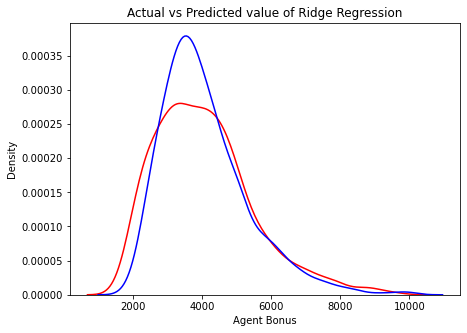

In [146]:
# Plotting y_test and y_pred
plt.figure(figsize=(7,5))
ax1=sns.distplot(y_test,hist=False,color='r',label='Actual Value')
sns.distplot(y_pred,hist=False,color='b',label='Predicted Value')
plt.title('Actual vs Predicted value of Ridge Regression')
plt.xlabel('Agent Bonus')
plt.show()

Text(0, 0.5, 'y_pred')

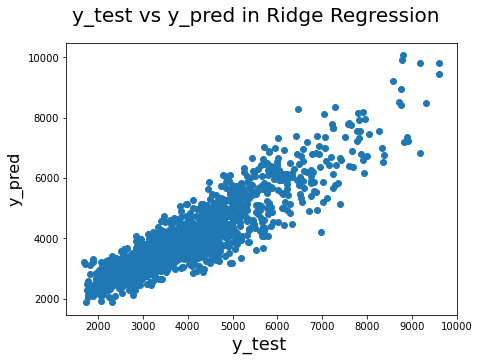

In [147]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure(figsize=(7,5))
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred in Ridge Regression', fontsize=20)   
plt.xlabel('y_test ', fontsize=18)                       
plt.ylabel('y_pred', fontsize=16)

<b>Equation of line is:</b> </br>

AgentBonus = 198.84 * Age + 215.41 * CustTenure + 47.57 * ExistingProdType + 151.12 * MonthlyIncome + 117.43 * ExistingPolicyTenure + 815.41 * SumAssured - 440.60 * Designation_Executive - 424.28 * Designation_Manager - 260.29 * Designation_Senior Manager - 44.31 * MaritalStatus_Married + 185.24 * PaymentMethod_Monthly - 69.06 * PaymentMethod_Yearly


In [148]:
resultsDf3 = pd.DataFrame({'Train RSME':[trainRSME], 'Test RSME':[testRSME]}, index=['Ridge Regression Model'])
resultsDf = pd.concat([resultsDf,resultsDf3])
resultsDf

,Train RSME,Test RSME
Linear Regression Model,613.47,623.56
Lasso Regression Model,613.72,623.72
Ridge Regression Model,613.47,623.57


<b>-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

### Elastic Net

In [149]:
from sklearn.linear_model import ElasticNet

In [150]:
# Initialize the Elastic Net model
elastic_net_model = ElasticNet(alpha=1.0, l1_ratio=0.5)

# Train the model on the training data
elastic_net_model.fit(X_train_rfe11c, y_train)

ElasticNet()

In [151]:
coefficients = elastic_net_model.coef_
intercept = elastic_net_model.intercept_

In [152]:
coefficients

array([222.28366749, 229.26520725,   5.86879916, 241.02026791,
       128.63794208, 537.58893548, -65.93949617, -52.16279746,
        19.14416179,  -3.26814303,   8.49255853, -11.92033676])

In [153]:
intercept

array([4130.80117171])

In [154]:
# Make predictions on the training set
y_train_pred = elastic_net_model.predict(X_train_rfe11c)

In [155]:
# Make predictions on the test set
trainRSME = metrics.mean_squared_error(y_train, y_train_pred, squared=False)
print(trainRSME)

675.7220047792772


In [156]:
# Make predictions on the test set
y_pred = elastic_net_model.predict(X_test_new)

In [157]:
testRSME = metrics.mean_squared_error(y_test, y_pred, squared=False)
print("Test RMSE:", testRSME)

Test RMSE: 688.8683025701162


In [158]:
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_pred)

print("Train R-squared:", r2_train)
print("Test R-squared:", r2_test)

Train R-squared: 0.7653002715108347
Test R-squared: 0.7654216248533667


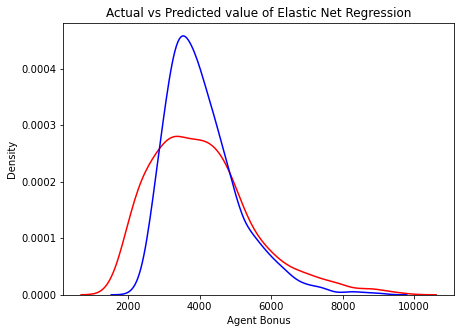

In [159]:
# Plotting y_test and y_pred
plt.figure(figsize=(7,5))
ax1=sns.distplot(y_test,hist=False,color='r',label='Actual Value')
sns.distplot(y_pred,hist=False,color='b',label='Predicted Value')
plt.title('Actual vs Predicted value of Elastic Net Regression')
plt.xlabel('Agent Bonus')
plt.show()

Text(0, 0.5, 'y_pred')

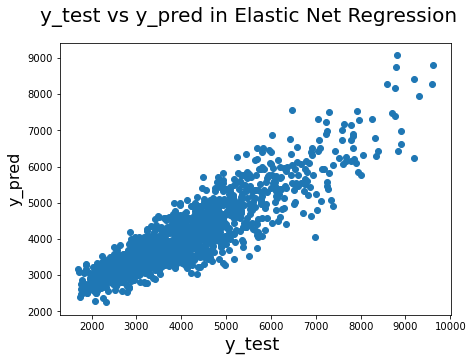

In [160]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure(figsize=(7,5))
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred in Elastic Net Regression', fontsize=20)   
plt.xlabel('y_test ', fontsize=18)                       
plt.ylabel('y_pred', fontsize=16)

<b>Equation of line is:</b> </br>

AgentBonus = 4130.80 + 222.28 * Age + 229.27 * CustTenure + 5.87 * ExistingProdType + 241.02 * MonthlyIncome + 128.64 * ExistingPolicyTenure + 537.59 * SumAssured - 65.94 * Designation_Executive - 52.16 * Designation_Manager + 19.14 * Designation_Senior Manager - 3.27 * MaritalStatus_Married + 8.49 * PaymentMethod_Monthly - 11.92 * PaymentMethod_Yearly

In [161]:
resultsDf4 = pd.DataFrame({'Train RSME':[trainRSME], 'Test RSME':[testRSME]}, index=['Elastic Net Regression Model'])
resultsDf = pd.concat([resultsDf,resultsDf4])
resultsDf

,Train RSME,Test RSME
Linear Regression Model,613.47,623.56
Lasso Regression Model,613.72,623.72
Ridge Regression Model,613.47,623.57
Elastic Net Regression Model,675.72,688.87


<b>-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

### Decision Tree for Regression

In [162]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [163]:
# Initialize the Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=42)

In [164]:
# Define the hyperparameter grid to search
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

In [165]:
# Initialize GridSearchCV with the regressor and the hyperparameter grid
grid_search = GridSearchCV(regressor, param_grid, cv=5, scoring='neg_mean_squared_error')

In [166]:
# Perform the grid search on the training data
grid_search.fit(X_train_rfe11c, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [167]:
# Get the best hyperparameters found during the grid search
best_params = grid_search.best_params_

In [168]:
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 10}


In [169]:
# Use the best hyperparameters to initialize the Decision Tree Regressor
best_regressor = DecisionTreeRegressor(**best_params, random_state=42)

In [170]:
# Train the model on the training data with the best hyperparameters
best_regressor.fit(X_train_rfe11c, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=10,
                      random_state=42)

In [171]:
# Make predictions on the training set
y_train_pred = best_regressor.predict(X_train_rfe11c)

In [172]:
# Make predictions on the test set
trainRSME = metrics.mean_squared_error(y_train, y_train_pred, squared=False)
print(trainRSME)

461.9346015804543


In [173]:
# Make predictions on the test set
y_pred = best_regressor.predict(X_test_new)

In [174]:
testRSME = metrics.mean_squared_error(y_test, y_pred, squared=False)
print("Test RMSE:", testRSME)

Test RMSE: 645.1816624283122


In [175]:
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_pred)

print("Train R-squared:", r2_train)
print("Test R-squared:", r2_test)

Train R-squared: 0.8903174717388306
Test R-squared: 0.7942311640160888


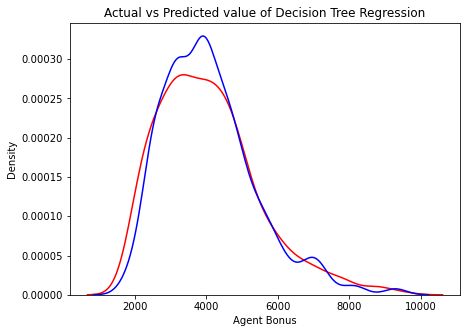

In [176]:
# Plotting y_test and y_pred
plt.figure(figsize=(7,5))
ax1=sns.distplot(y_test,hist=False,color='r',label='Actual Value')
sns.distplot(y_pred,hist=False,color='b',label='Predicted Value')
plt.title('Actual vs Predicted value of Decision Tree Regression')
plt.xlabel('Agent Bonus')
plt.show()

Text(0, 0.5, 'y_pred')

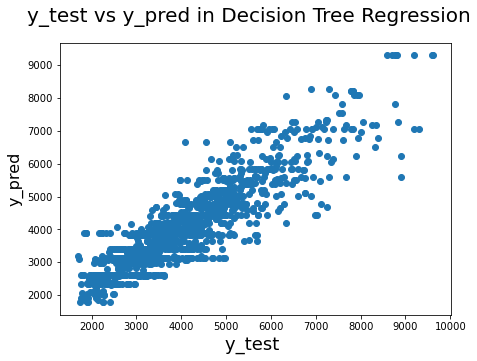

In [177]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure(figsize=(7,5))
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred in Decision Tree Regression', fontsize=20)   
plt.xlabel('y_test ', fontsize=18)                       
plt.ylabel('y_pred', fontsize=16)

In [178]:
resultsDf5 = pd.DataFrame({'Train RSME':[trainRSME], 'Test RSME':[testRSME]}, index=['Decision Tree Regression Model'])
resultsDf = pd.concat([resultsDf,resultsDf5])
resultsDf

,Train RSME,Test RSME
Linear Regression Model,613.47,623.56
Lasso Regression Model,613.72,623.72
Ridge Regression Model,613.47,623.57
Elastic Net Regression Model,675.72,688.87
Decision Tree Regression Model,461.93,645.18


<b>-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

### Random Forest Regression

In [179]:
from sklearn.ensemble import RandomForestRegressor

In [180]:
# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

In [181]:
# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],        
    'max_depth': [None, 5, 10, 15],        
    'min_samples_split': [2, 5, 10],       
    'min_samples_leaf': [1, 2, 4],        
    'max_features': ['auto', 'sqrt', 'log2'] 
}

In [182]:
# Initialize GridSearchCV with the regressor and the hyperparameter grid
grid_search = GridSearchCV(rf_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')

In [183]:
# Perform the grid search on the training data
grid_search.fit(X_train_rfe11c, y_train)   #commenting this part of line as it takes long time to run, we already had hyperparameters

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [184]:
# Get the best hyperparameters found during the grid search
best_params = grid_search.best_params_

In [185]:
best_params

{'max_depth': 15,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 150}

In [186]:
best_params = {'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}

In [187]:
# Use the best hyperparameters to initialize the Random Forest Regressor
best_regressor = RandomForestRegressor(**best_params, random_state=42)

In [188]:
# Train the model on the training data with the best hyperparameters
best_regressor.fit(X_train_rfe11c, y_train)

RandomForestRegressor(max_depth=15, n_estimators=150, random_state=42)

In [189]:
# Make predictions on the training set
y_train_pred = best_regressor.predict(X_train_rfe11c)

In [190]:
# Make predictions on the test set
trainRSME = metrics.mean_squared_error(y_train, y_train_pred, squared=False)
print(trainRSME)

252.9742935328708


In [191]:
# Make predictions on the test set
y_pred = best_regressor.predict(X_test_new)

In [192]:
testRSME = metrics.mean_squared_error(y_test, y_pred, squared=False)
print("Test RMSE:", testRSME)

Test RMSE: 562.3248732516129


In [193]:
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_pred)

print("Train R-squared:", r2_train)
print("Test R-squared:", r2_test)

Train R-squared: 0.9671050487644931
Test R-squared: 0.84368877795312


In [194]:
feature_importance = best_regressor.feature_importances_
feature_names = X_train_rfe11c.columns

# Sort the features based on their importance
sorted_indices = feature_importance.argsort()[::-1]

In [195]:
feature_importance

array([0.076273  , 0.06761595, 0.00547004, 0.0783221 , 0.01692163,
       0.74395236, 0.00149626, 0.00208654, 0.00199984, 0.00295739,
       0.00080566, 0.00209922])

In [196]:
sorted_indices

array([ 5,  3,  0,  1,  4,  2,  9, 11,  7,  8,  6, 10], dtype=int64)

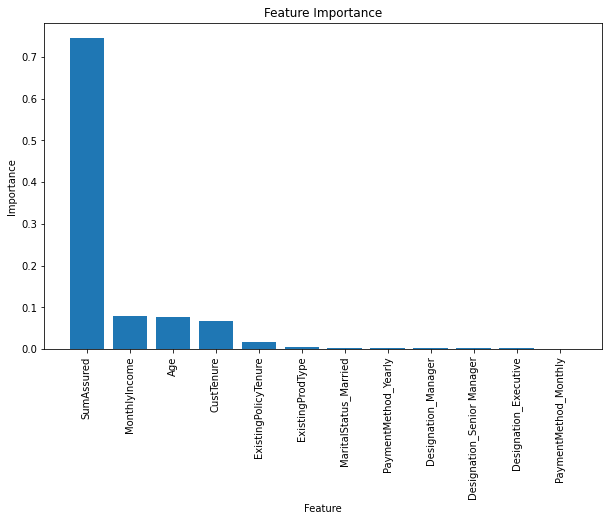

In [197]:
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance[sorted_indices])
plt.xticks(range(len(feature_importance)), feature_names[sorted_indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

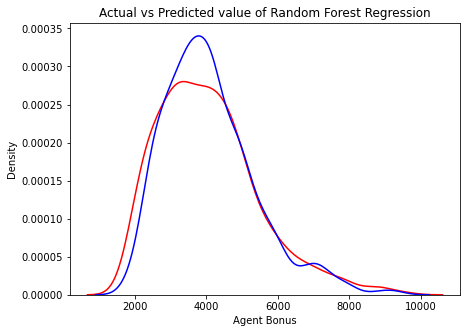

In [198]:
# Plotting y_test and y_pred
plt.figure(figsize=(7,5))
ax1=sns.distplot(y_test,hist=False,color='r',label='Actual Value')
sns.distplot(y_pred,hist=False,color='b',label='Predicted Value')
plt.title('Actual vs Predicted value of Random Forest Regression')
plt.xlabel('Agent Bonus')
plt.show()

Text(0, 0.5, 'y_pred')

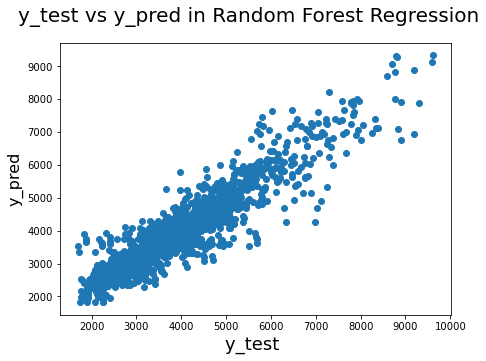

In [199]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure(figsize=(7,5))
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred in Random Forest Regression', fontsize=20)   
plt.xlabel('y_test ', fontsize=18)                       
plt.ylabel('y_pred', fontsize=16)

In [200]:
resultsDf6 = pd.DataFrame({'Train RSME':[trainRSME], 'Test RSME':[testRSME]}, index=['Random Forest Regression Model'])
resultsDf = pd.concat([resultsDf,resultsDf6])
resultsDf

,Train RSME,Test RSME
Linear Regression Model,613.47,623.56
Lasso Regression Model,613.72,623.72
Ridge Regression Model,613.47,623.57
Elastic Net Regression Model,675.72,688.87
Decision Tree Regression Model,461.93,645.18
Random Forest Regression Model,252.97,562.32


<b>-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

### Ensemble Techniques

### Ada-Boost on Lasso Regression

In [201]:
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor

In [202]:
adaboost_model = AdaBoostRegressor(base_estimator=lasso_model, n_estimators=50, random_state=42)

In [203]:
# Train the model on the training data
adaboost_model.fit(X_train_rfe11c, y_train)

AdaBoostRegressor(base_estimator=Lasso(), random_state=42)

In [204]:
# Make predictions on the training set
y_train_pred = adaboost_model.predict(X_train_rfe11c)

In [205]:
# Make predictions on the test set
trainRSME = metrics.mean_squared_error(y_train, y_train_pred, squared=False)
print(trainRSME)

623.61303437011


In [206]:
# Make predictions on the test set
y_pred = adaboost_model.predict(X_test_new)

In [207]:
testRSME = metrics.mean_squared_error(y_test, y_pred, squared=False)
print("Test RMSE:", testRSME)

Test RMSE: 638.134892868908


In [208]:
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_pred)

print("Train R-squared:", r2_train)
print("Test R-squared:", r2_test)

Train R-squared: 0.800102744567168
Test R-squared: 0.7987014925018407


In [209]:
resultsDf7 = pd.DataFrame({'Train RSME':[trainRSME], 'Test RSME':[testRSME]}, index=['Lasso+AdaBoosting Regression Model'])
resultsDf = pd.concat([resultsDf,resultsDf7])
resultsDf

,Train RSME,Test RSME
Linear Regression Model,613.47,623.56
Lasso Regression Model,613.72,623.72
Ridge Regression Model,613.47,623.57
Elastic Net Regression Model,675.72,688.87
Decision Tree Regression Model,461.93,645.18
Random Forest Regression Model,252.97,562.32
Lasso+AdaBoosting Regression Model,623.61,638.13


### Bagging on Lasso Regression

In [210]:
bagging_model = BaggingRegressor(base_estimator=lasso_model, n_estimators=10, random_state=42)

In [211]:
# Train the model on the training data
bagging_model.fit(X_train_rfe11c, y_train)

BaggingRegressor(base_estimator=Lasso(), random_state=42)

In [212]:
# Make predictions on the training set
y_train_pred = bagging_model.predict(X_train_rfe11c)

In [213]:
# Make predictions on the test set
trainRSME = metrics.mean_squared_error(y_train, y_train_pred, squared=False)
print(trainRSME)

613.7664993056718


In [214]:
# Make predictions on the test set
y_pred = bagging_model.predict(X_test_new)

In [215]:
testRSME = metrics.mean_squared_error(y_test, y_pred, squared=False)
print("Test RMSE:", testRSME)

Test RMSE: 623.9441055499273


In [216]:
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_pred)

print("Train R-squared:", r2_train)
print("Test R-squared:", r2_test)

Train R-squared: 0.8063654620933467
Test R-squared: 0.8075548622344364


In [217]:
resultsDf8 = pd.DataFrame({'Train RSME':[trainRSME], 'Test RSME':[testRSME]}, index=['Lasso+Bagging Regression Model'])
resultsDf = pd.concat([resultsDf,resultsDf8])
resultsDf

,Train RSME,Test RSME
Linear Regression Model,613.47,623.56
Lasso Regression Model,613.72,623.72
Ridge Regression Model,613.47,623.57
Elastic Net Regression Model,675.72,688.87
Decision Tree Regression Model,461.93,645.18
Random Forest Regression Model,252.97,562.32
Lasso+AdaBoosting Regression Model,623.61,638.13
Lasso+Bagging Regression Model,613.77,623.94


We will apply Bagging and Boosting on Ridge Regression

### Ada-Boost on Ridge Regression

In [218]:
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor

In [219]:
adaboost_model = AdaBoostRegressor(base_estimator=ridge_model, n_estimators=50, random_state=42)

In [220]:
# Train the model on the training data
adaboost_model.fit(X_train_rfe11c, y_train)

AdaBoostRegressor(base_estimator=Ridge(), random_state=42)

In [221]:
# Make predictions on the training set
y_train_pred = adaboost_model.predict(X_train_rfe11c)

In [222]:
# Make predictions on the test set
trainRSME = metrics.mean_squared_error(y_train, y_train_pred, squared=False)
print(trainRSME)

623.9461056066917


In [223]:
# Make predictions on the test set
y_pred = adaboost_model.predict(X_test_new)

In [224]:
testRSME = metrics.mean_squared_error(y_test, y_pred, squared=False)
print("Test RMSE:", testRSME)

Test RMSE: 638.1238435148274


In [225]:
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_pred)

print("Train R-squared:", r2_train)
print("Test R-squared:", r2_test)

Train R-squared: 0.7998891576068068
Test R-squared: 0.7987084634393458


In [226]:
resultsDf8 = pd.DataFrame({'Train RSME':[trainRSME], 'Test RSME':[testRSME]}, index=['Ridge+AdaBoosting Regression Model'])
resultsDf = pd.concat([resultsDf,resultsDf8])
resultsDf

,Train RSME,Test RSME
Linear Regression Model,613.47,623.56
Lasso Regression Model,613.72,623.72
Ridge Regression Model,613.47,623.57
Elastic Net Regression Model,675.72,688.87
Decision Tree Regression Model,461.93,645.18
Random Forest Regression Model,252.97,562.32
Lasso+AdaBoosting Regression Model,623.61,638.13
Lasso+Bagging Regression Model,613.77,623.94
Ridge+AdaBoosting Regression Model,623.95,638.12


### Bagging on Ridge Regression

In [227]:
bagging_model = BaggingRegressor(base_estimator=ridge_model, n_estimators=10, random_state=42)

In [228]:
# Train the model on the training data
bagging_model.fit(X_train_rfe11c, y_train)

BaggingRegressor(base_estimator=Ridge(), random_state=42)

In [229]:
# Make predictions on the training set
y_train_pred = bagging_model.predict(X_train_rfe11c)

In [230]:
# Make predictions on the test set
trainRSME = metrics.mean_squared_error(y_train, y_train_pred, squared=False)
print(trainRSME)

613.6313274402602


In [231]:
# Make predictions on the test set
y_pred = bagging_model.predict(X_test_new)

In [232]:
testRSME = metrics.mean_squared_error(y_test, y_pred, squared=False)
print("Test RMSE:", testRSME)

Test RMSE: 623.9049436839794


In [233]:
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_pred)

print("Train R-squared:", r2_train)
print("Test R-squared:", r2_test)

Train R-squared: 0.8064507422757576
Test R-squared: 0.8075790191231891


In [234]:
resultsDf9 = pd.DataFrame({'Train RSME':[trainRSME], 'Test RSME':[testRSME]}, index=['Ridge+Bagging Regression Model'])
resultsDf = pd.concat([resultsDf,resultsDf9])
resultsDf

,Train RSME,Test RSME
Linear Regression Model,613.47,623.56
Lasso Regression Model,613.72,623.72
Ridge Regression Model,613.47,623.57
Elastic Net Regression Model,675.72,688.87
Decision Tree Regression Model,461.93,645.18
Random Forest Regression Model,252.97,562.32
Lasso+AdaBoosting Regression Model,623.61,638.13
Lasso+Bagging Regression Model,613.77,623.94
Ridge+AdaBoosting Regression Model,623.95,638.12
Ridge+Bagging Regression Model,613.63,623.90


## END